In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/csp.csv')

# EDA

In [ ]:
data['date'] = pd.to_datetime(data['date'],format='%d-%m-%Y')

In [ ]:
data['month'] = data['date'].dt.month

In [ ]:
data.head()

date retailer  paid_clicks  paid_impressions  paid_ad_revenue  \
0 2018-01-01        A        23459          26364079            29778   
1 2018-01-01        B        12232          13972907            15057   
2 2018-01-02        A        25444          28855109            31795   
3 2018-01-02        B        14725          16614842            18121   
4 2018-01-03        A        27403          31057581            34370   

   organic_page_views  organic_transactions  organic_sales_units  \
0            14157871                281216               558736   
1             7868838                206671               429523   
2            12434724                249112               510431   
3             7573973                227567               428121   
4            15261160                305484               593544   

   organic_sales_revenue  month  
0               11167429      1  
1                8320277      1  
2               10178081      1  
3                8541935      1  
4               11996719      1

In [ ]:
data.shape

(180, 10)

In [ ]:
data.size

1800

In [ ]:
data.isna().sum()

date                     0
retailer                 0
paid_clicks              0
paid_impressions         0
paid_ad_revenue          0
organic_page_views       0
organic_transactions     0
organic_sales_units      0
organic_sales_revenue    0
month                    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   180 non-null    datetime64[ns]
 1   retailer               180 non-null    object        
 2   paid_clicks            180 non-null    int64         
 3   paid_impressions       180 non-null    int64         
 4   paid_ad_revenue        180 non-null    int64         
 5   organic_page_views     180 non-null    int64         
 6   organic_transactions   180 non-null    int64         
 7   organic_sales_units    180 non-null    int64         
 8   organic_sales_revenue  180 non-null    int64         
 9   month                  180 non-null    int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 14.2+ KB


# Removing Outliers

In [ ]:
num_cols = ['paid_clicks', 'paid_impressions', 'organic_page_views', 'organic_transactions', 'organic_sales_units', 'organic_sales_revenue']

for col in num_cols:
    Q1 = np.percentile(data[col], 25, method='midpoint')
    Q3 = np.percentile(data[col], 75, method='midpoint')
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    # Filter rows based on the conditions
    data = data[(data[col] >= lower) & (data[col] <= upper)]

# Resetting the index after dropping rows
data.reset_index(drop=True, inplace=True)

# Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

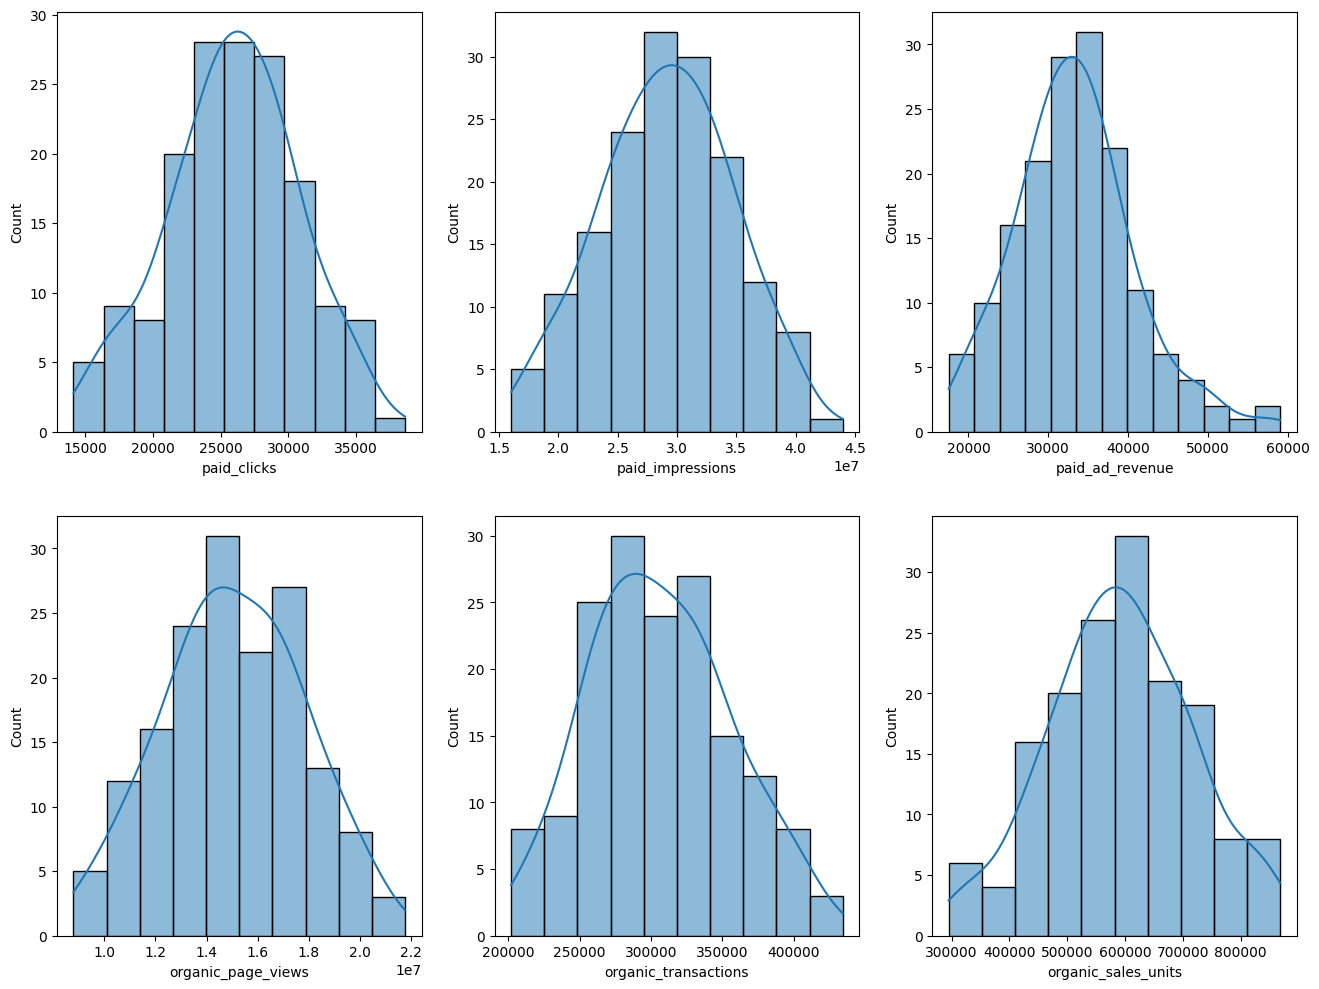

In [ ]:
num_cols = ['paid_clicks','paid_impressions','paid_ad_revenue','organic_page_views','organic_transactions','organic_sales_units','organic_sales_revenue']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16,12))

index = 0

for rows in range(2):
  for cols in range(3):
    sns.histplot(data[num_cols[index]], ax=axis[rows,cols],kde=True)
    index += 1
plt.show

<Axes: xlabel='organic_sales_revenue', ylabel='Count'>

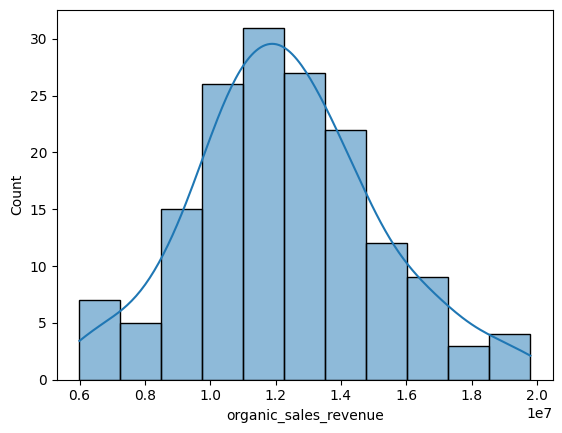

In [ ]:
sns.histplot(data=data[num_cols[-1]],kde=True)

<function matplotlib.pyplot.show(close=None, block=None)>

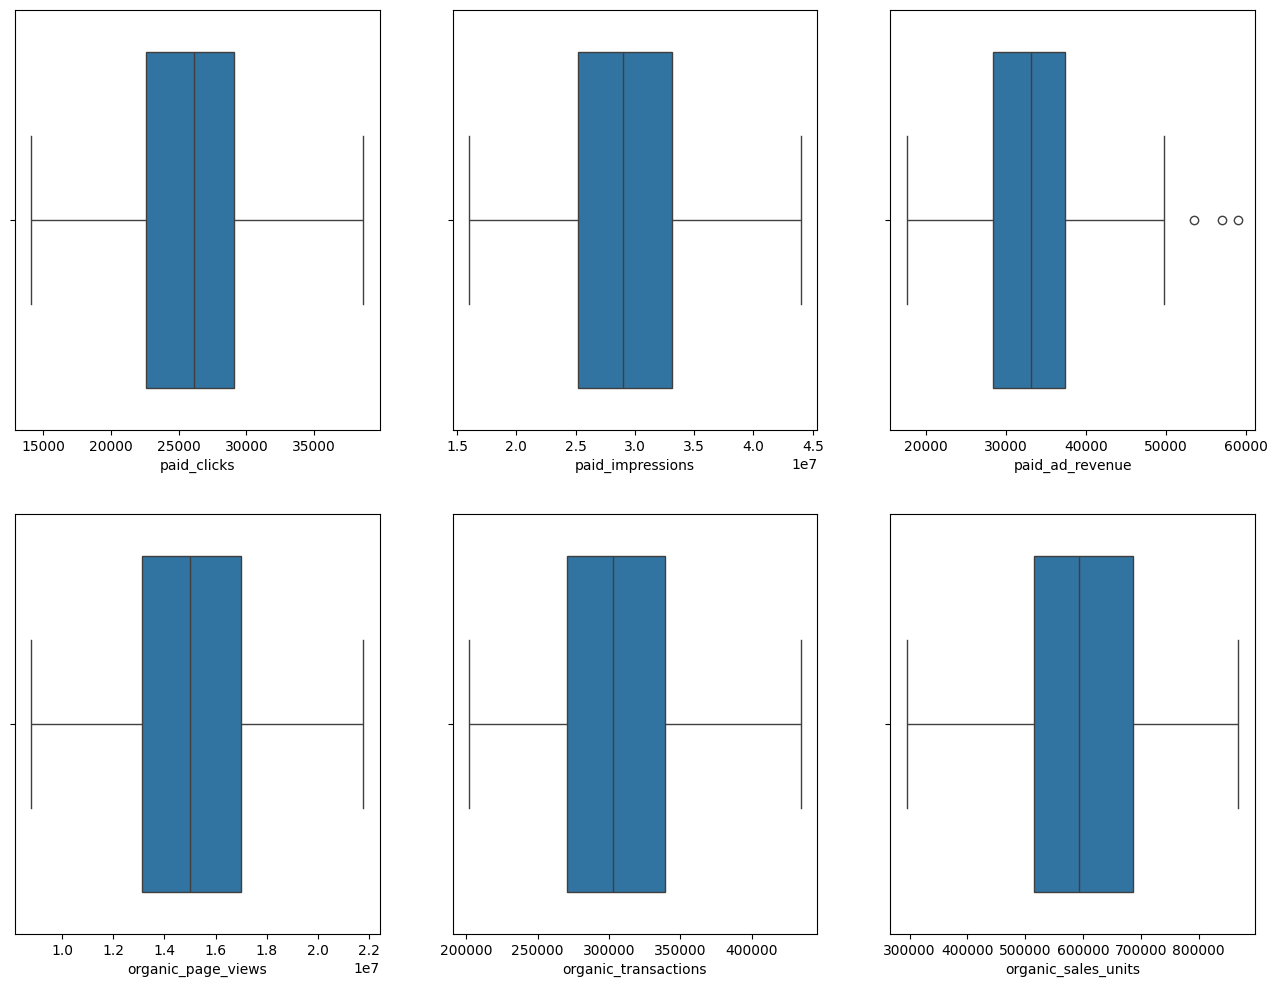

In [ ]:
num_cols = ['paid_clicks','paid_impressions','paid_ad_revenue','organic_page_views','organic_transactions','organic_sales_units','organic_sales_revenue']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16,12))

index = 0

for rows in range(2):
  for cols in range(3):
    sns.boxplot(data[num_cols[index]], ax=axis[rows,cols],orient='h')
    index += 1
plt.show

<Axes: xlabel='organic_sales_revenue'>

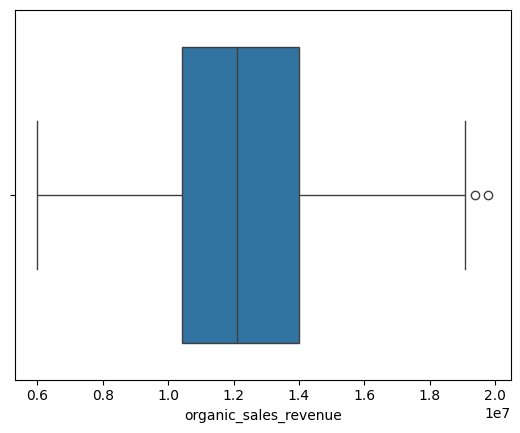

In [ ]:
sns.boxplot(data=data[num_cols[-1]],orient='h')

# Description of Data

In [ ]:
num_cols = ['paid_clicks', 'paid_impressions', 'paid_ad_revenue', 'organic_page_views', 'organic_transactions', 'organic_sales_units', 'organic_sales_revenue']

# Select only the numeric columns
numeric_data = data[num_cols]

# Display the description of all numeric columns
description = numeric_data.describe()
print(description)


        paid_clicks  paid_impressions  paid_ad_revenue  organic_page_views  \
count    161.000000      1.610000e+02       161.000000        1.610000e+02   
mean   25940.652174      2.914974e+07     33368.590062        1.506541e+07   
std     4836.895704      5.591980e+06      7462.385189        2.755338e+06   
min    14144.000000      1.602014e+07     17541.000000        8.802887e+06   
25%    22568.000000      2.520170e+07     28363.000000        1.310828e+07   
50%    26161.000000      2.903818e+07     33105.000000        1.500914e+07   
75%    29112.000000      3.309012e+07     37341.000000        1.697220e+07   
max    38601.000000      4.397613e+07     59068.000000        2.175600e+07   

       organic_transactions  organic_sales_units  organic_sales_revenue  
count            161.000000           161.000000           1.610000e+02  
mean          306276.869565        593013.068323           1.230146e+07  
std            49434.642742        123948.498841           2.801248e+06  
m

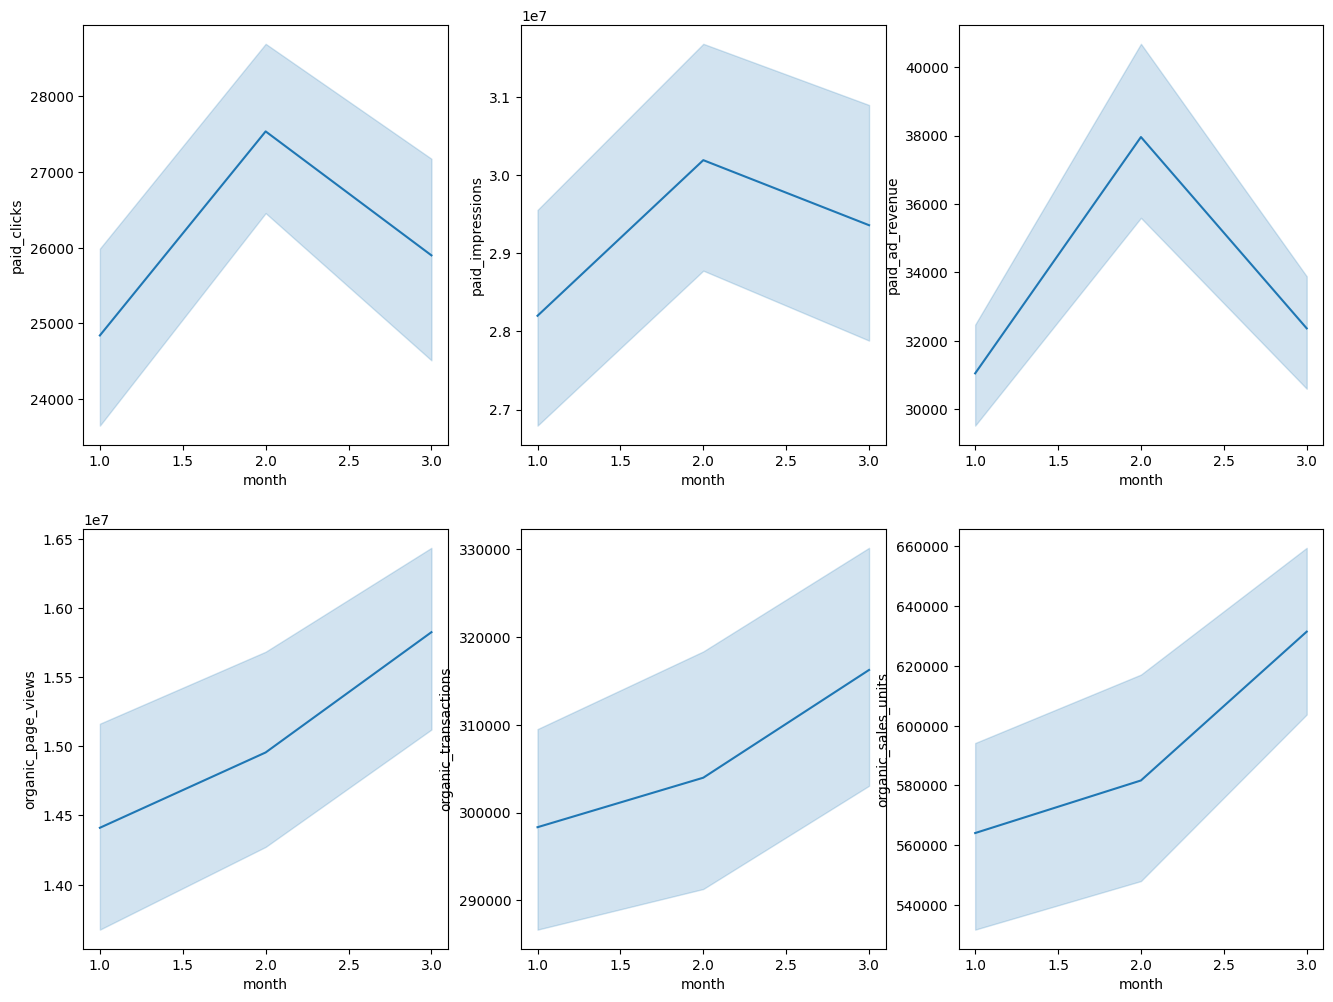

In [ ]:
cat_cols = ['paid_clicks','paid_impressions','paid_ad_revenue','organic_page_views','organic_transactions','organic_sales_units','organic_sales_revenue']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16,12))

index = 0

for rows in range(2):
  for cols in range(3):
    sns.lineplot(data=data,x= 'month', y=cat_cols[index],ax = axis[rows,cols])
    index += 1
plt.show()

<Axes: xlabel='month', ylabel='organic_sales_revenue'>

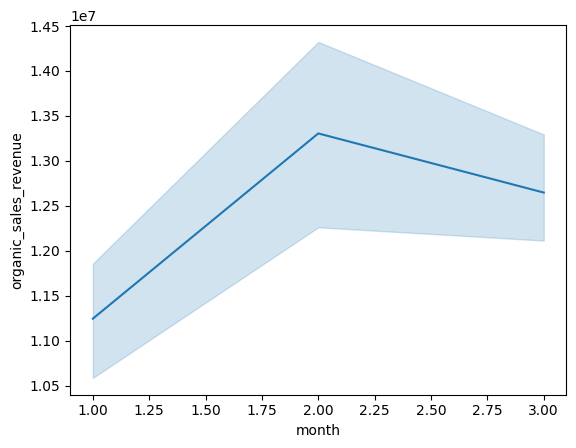

In [ ]:
sns.lineplot(data=data,x= 'month', y=cat_cols[-1])

# Bivariate Analysis

<Axes: xlabel='paid_impressions', ylabel='paid_clicks'>

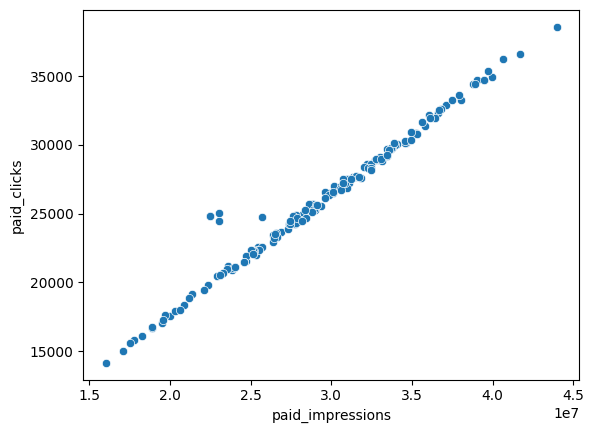

In [ ]:
sns.scatterplot(data=data,x='paid_impressions',y='paid_clicks')

<Axes: xlabel='paid_impressions', ylabel='paid_ad_revenue'>

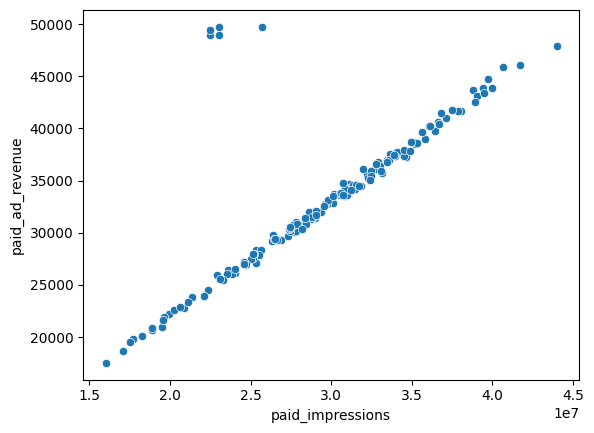

In [ ]:
sns.scatterplot(data=data,x='paid_impressions',y='paid_ad_revenue')

<Axes: xlabel='paid_clicks', ylabel='paid_ad_revenue'>

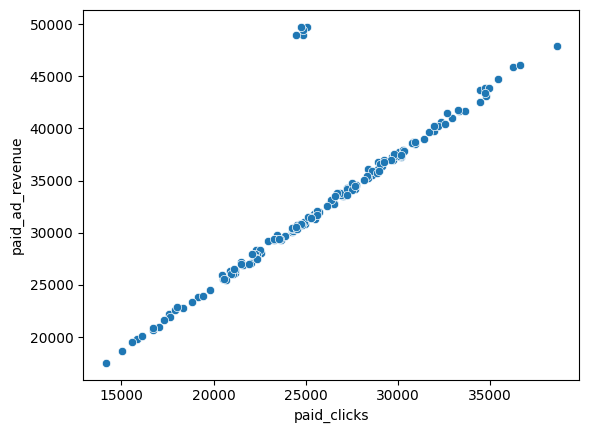

In [ ]:
sns.scatterplot(data=data,x='paid_clicks',y='paid_ad_revenue')

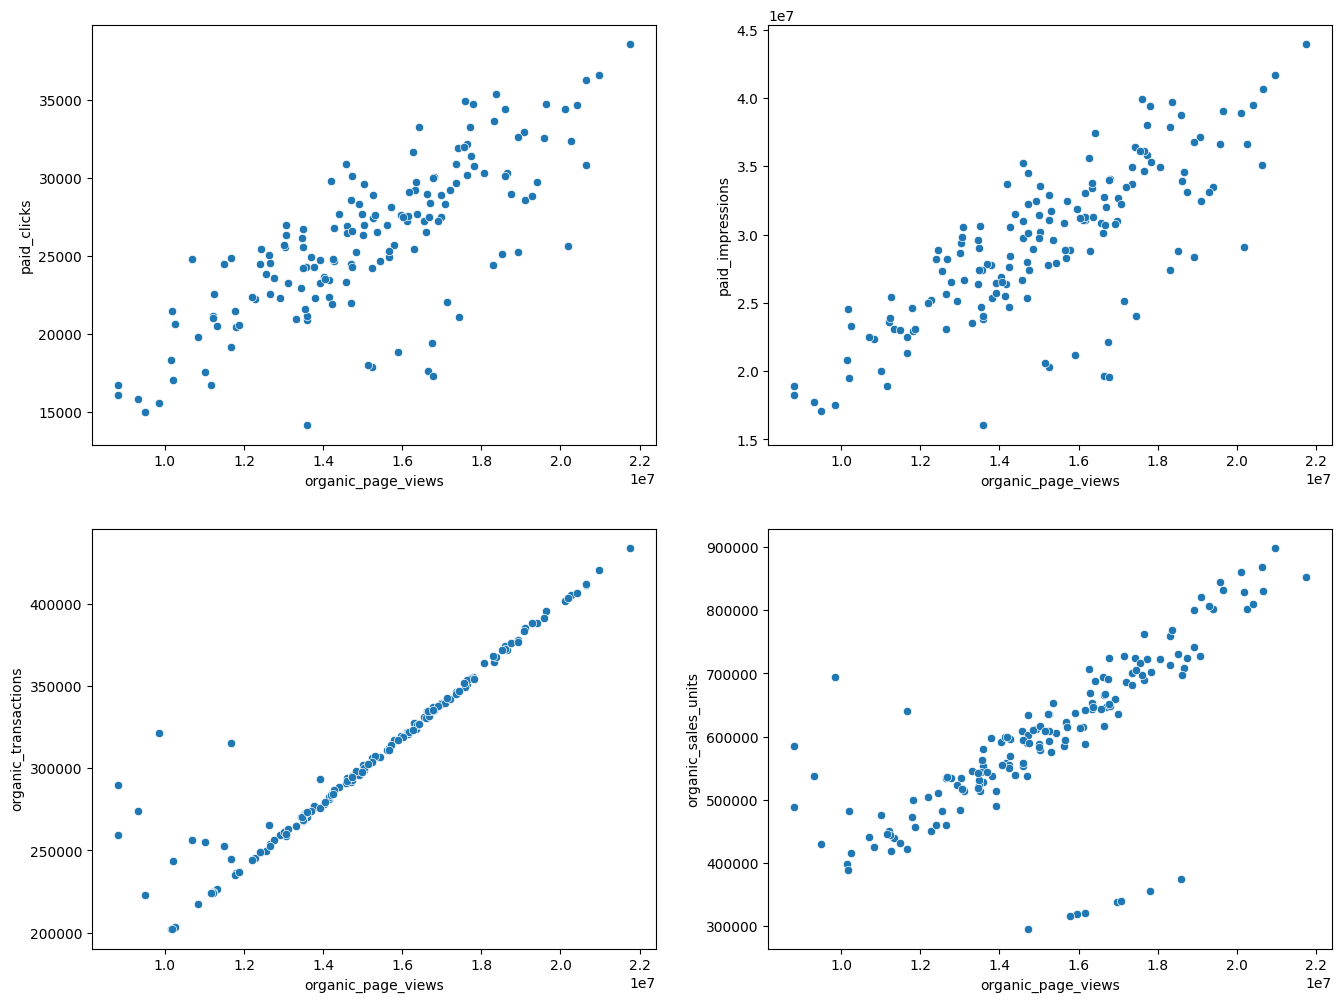

In [ ]:
cat_cols = ['paid_clicks','paid_impressions','organic_transactions','organic_sales_units','organic_sales_revenue']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

index = 0

for rows in range(2):
  for cols in range(2):
    sns.scatterplot(data=data,x= 'organic_page_views', y=cat_cols[index],ax = axis[rows,cols])
    index += 1
plt.show()

<Axes: xlabel='organic_page_views', ylabel='organic_sales_revenue'>

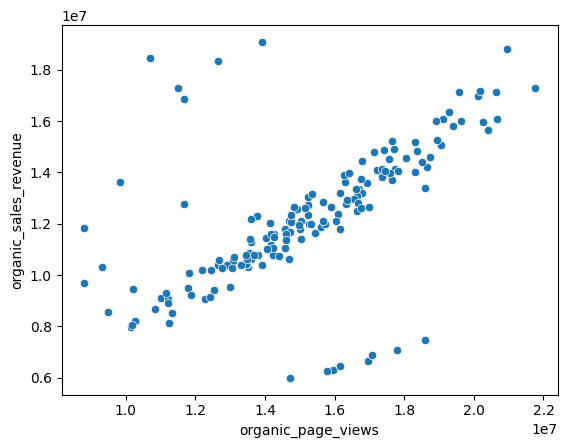

In [ ]:
sns.scatterplot(data=data,x= 'organic_page_views', y=cat_cols[-1])

# Multivariate Analysis

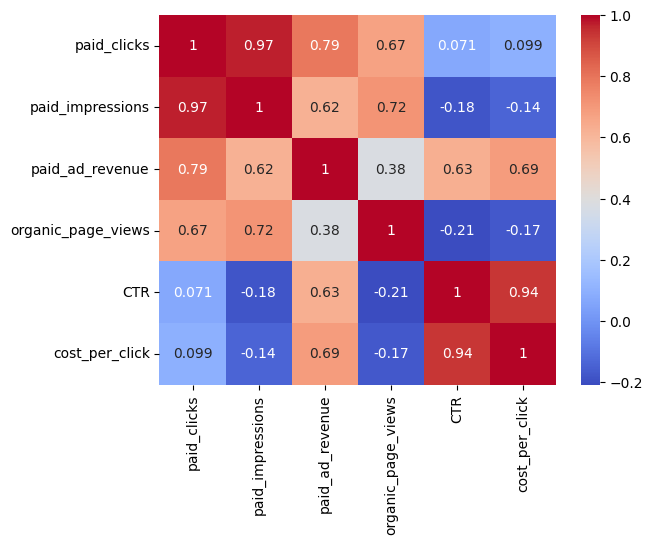

In [ ]:
data_B = data[data['retailer']=='B']
data_A = data[data['retailer']=='A']
selected_columns = ['paid_clicks', 'paid_impressions', 'paid_ad_revenue','organic_page_views','CTR','cost_per_click']
figsize=(20,12)
correlation_data_B = data_B[selected_columns]
sns.heatmap(correlation_data_B.corr(),annot=True,cmap='coolwarm')
plt.show()

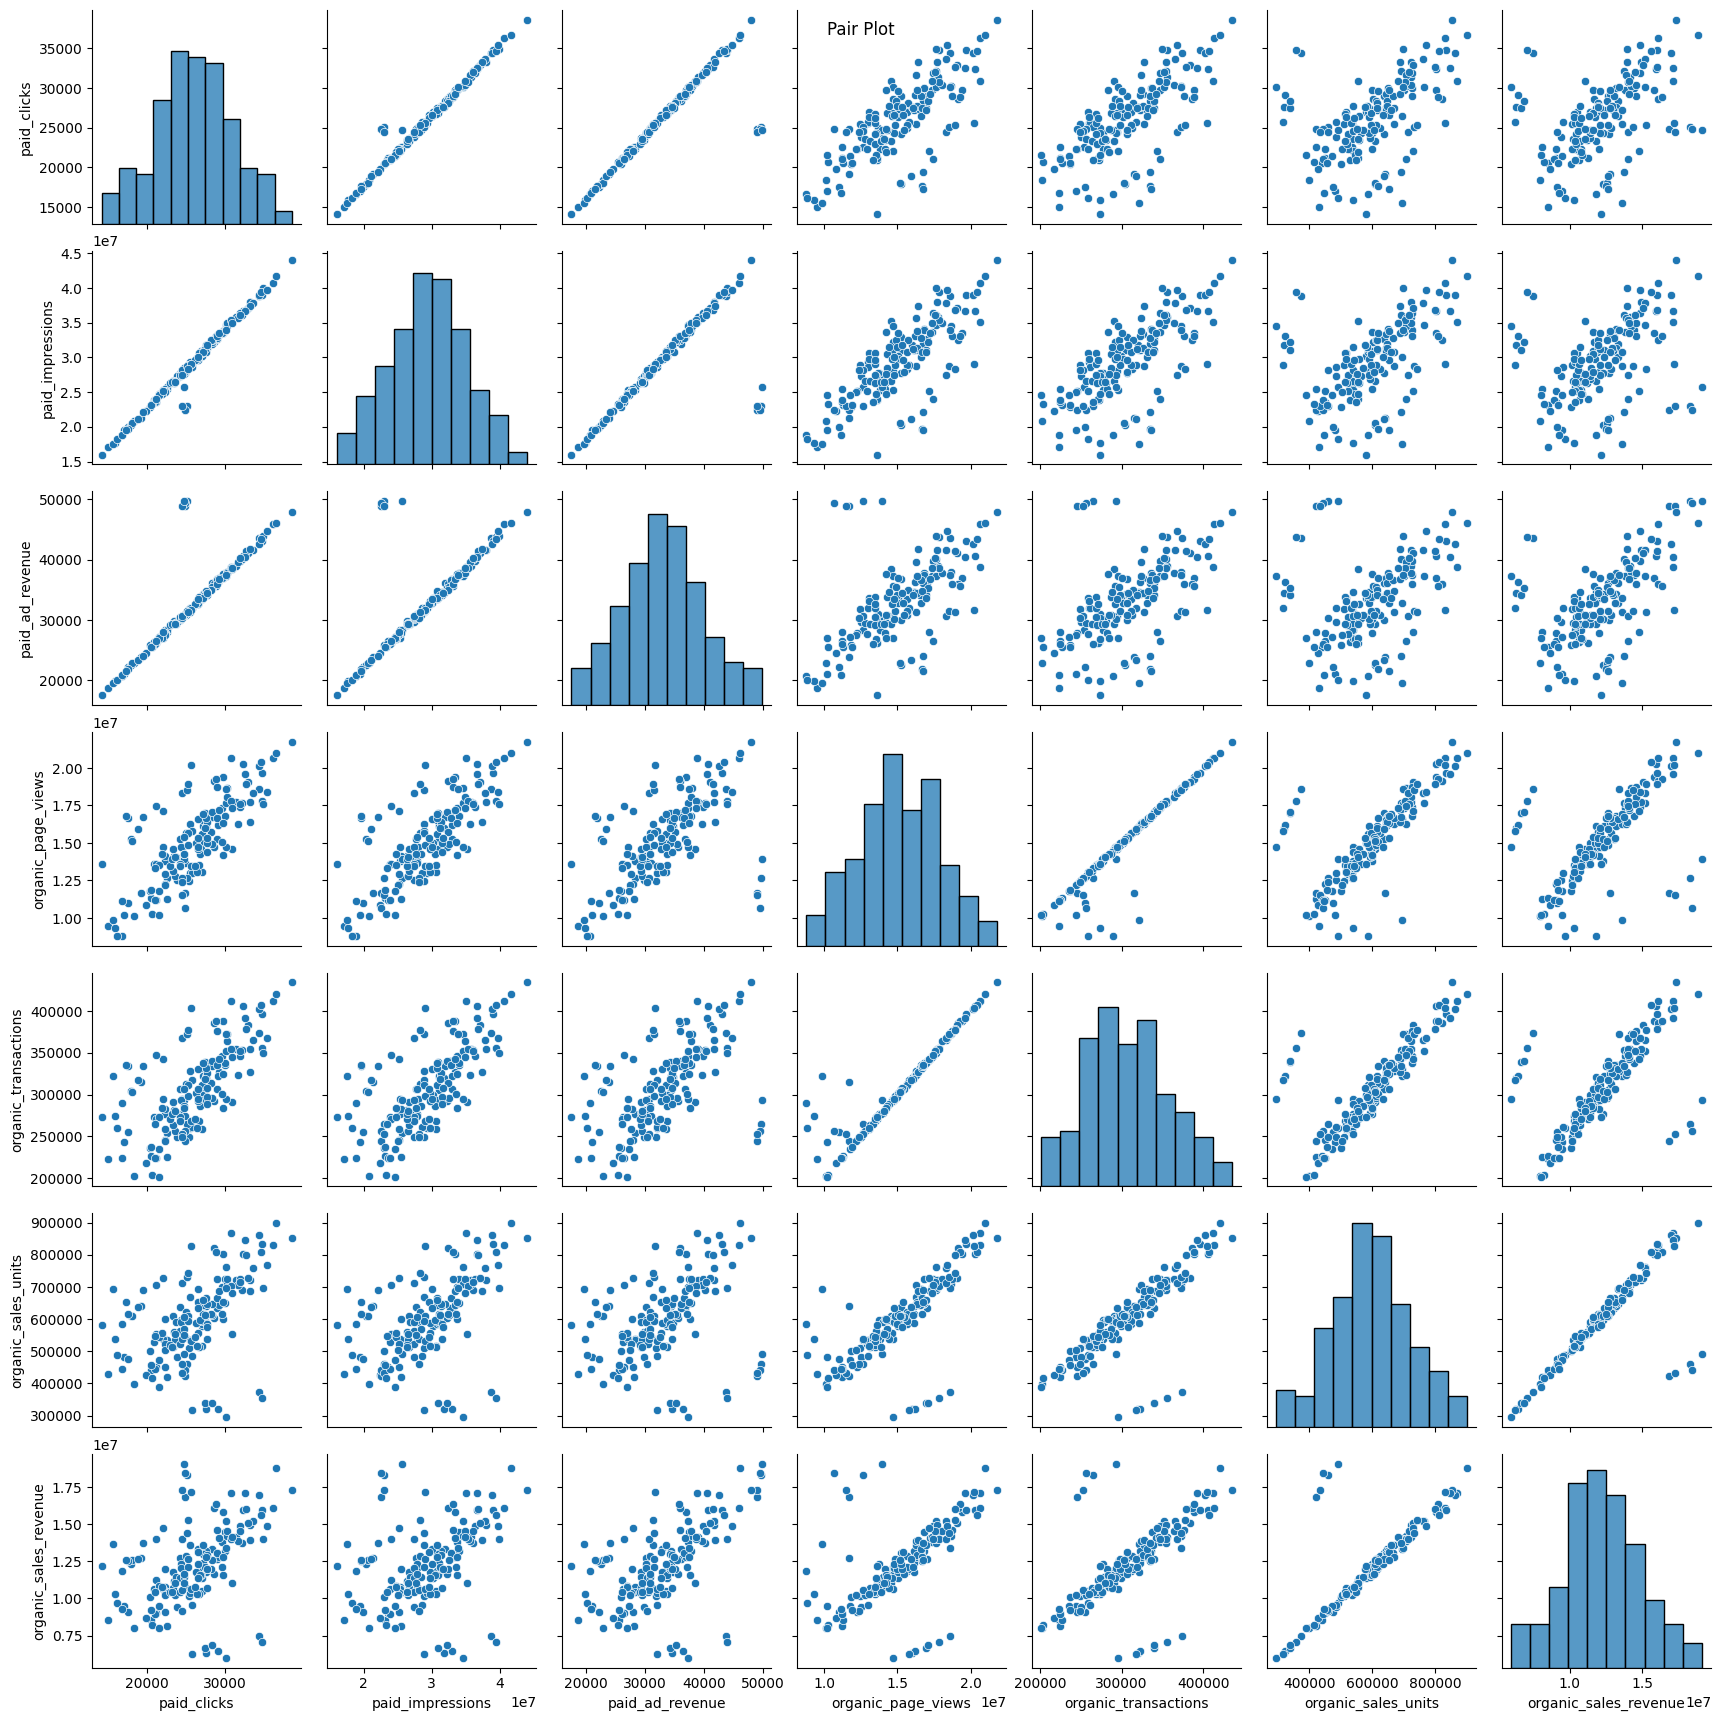

In [ ]:
selected_columns = [ 'paid_clicks', 'paid_impressions', 'paid_ad_revenue','organic_page_views', 'organic_transactions', 'organic_sales_units','organic_sales_revenue']
pair_plot_data = data[selected_columns]

# Create pair plot
sns.pairplot(pair_plot_data)
plt.suptitle('Pair Plot')
plt.show()

# Feature Engineering

In [ ]:
data['day'] = data['date'].dt.day
data['CTR'] = (data['paid_clicks'] / data['paid_impressions'])*100
data['cost_per_click'] = data['paid_ad_revenue'] / data['paid_clicks']
data['day_of_week'] = data['date'].dt.day_of_week
data['organic_conversion_rate'] = (data['organic_transactions']/data['organic_page_views'])*100

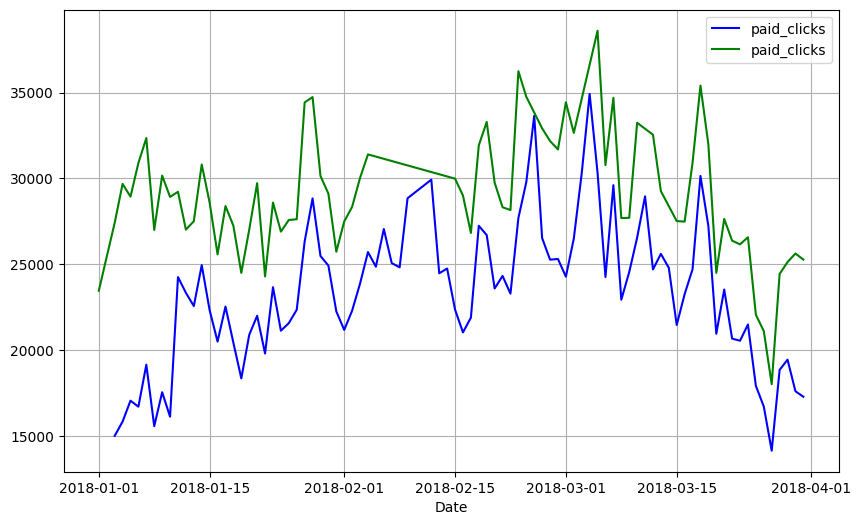

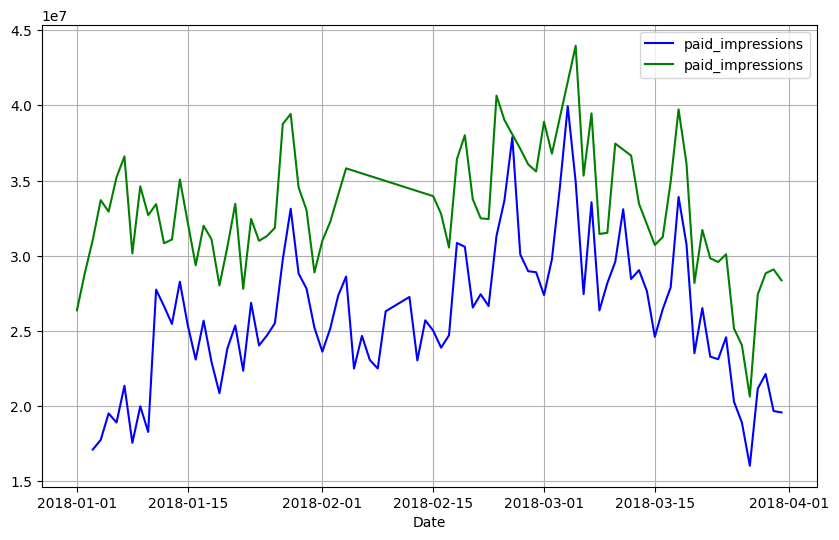

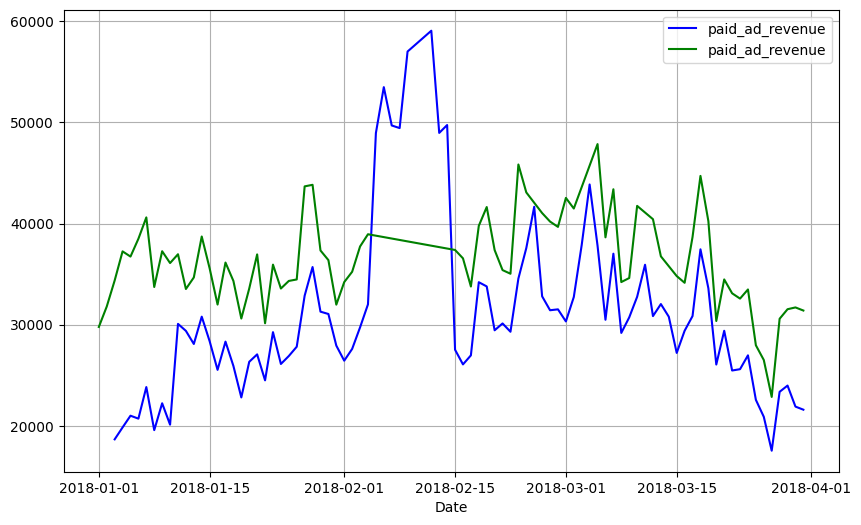

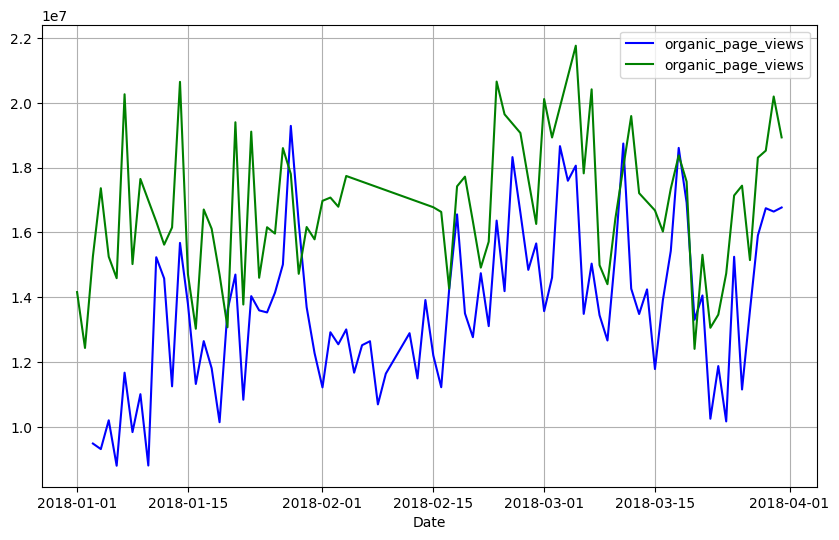

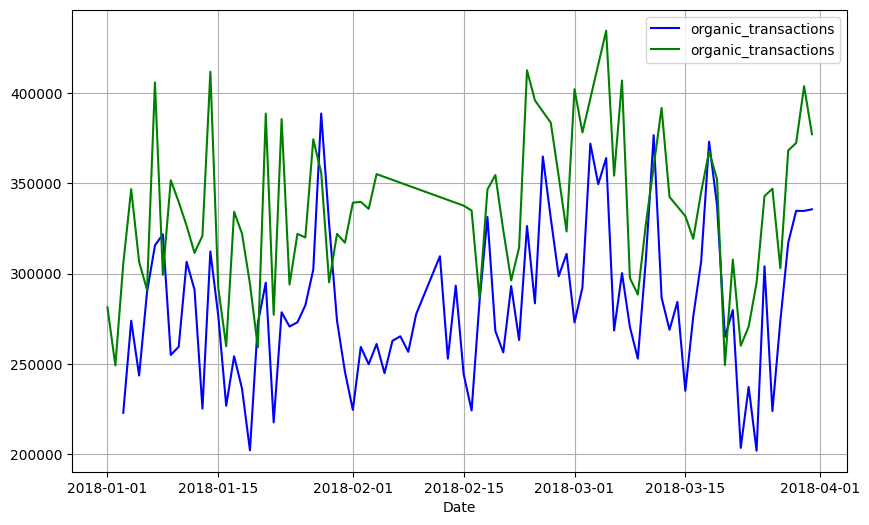

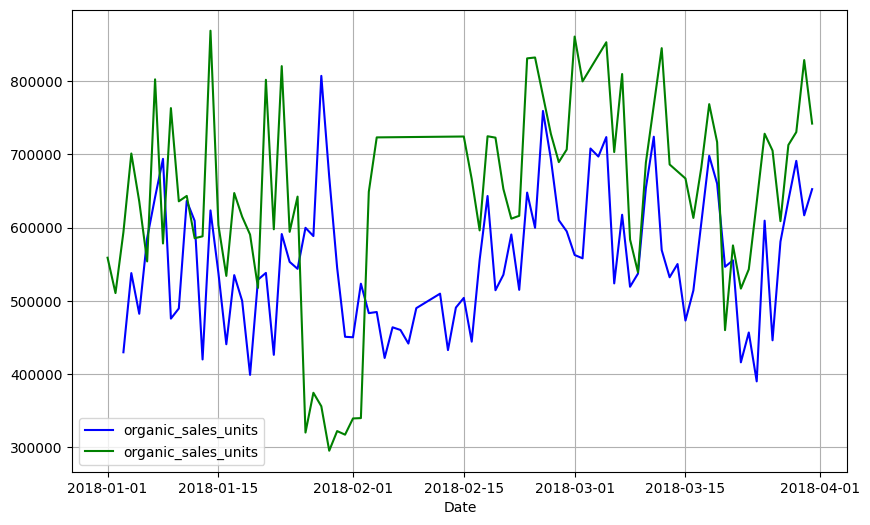

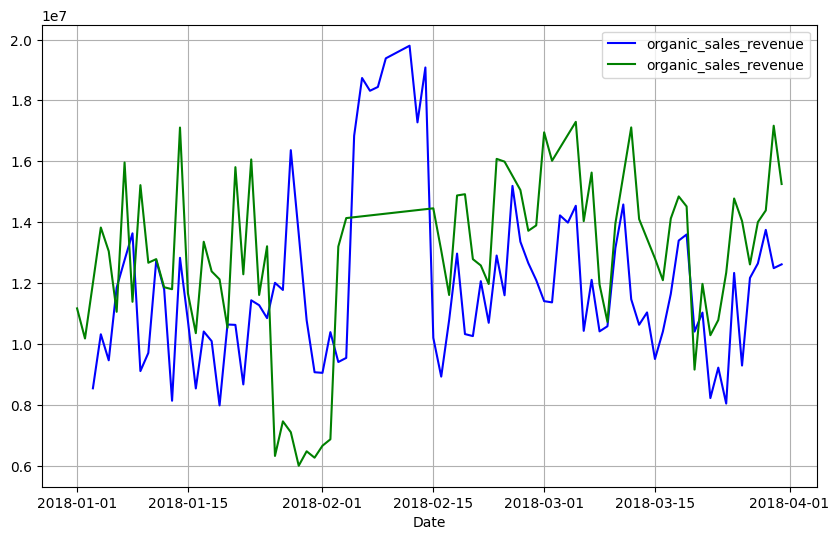

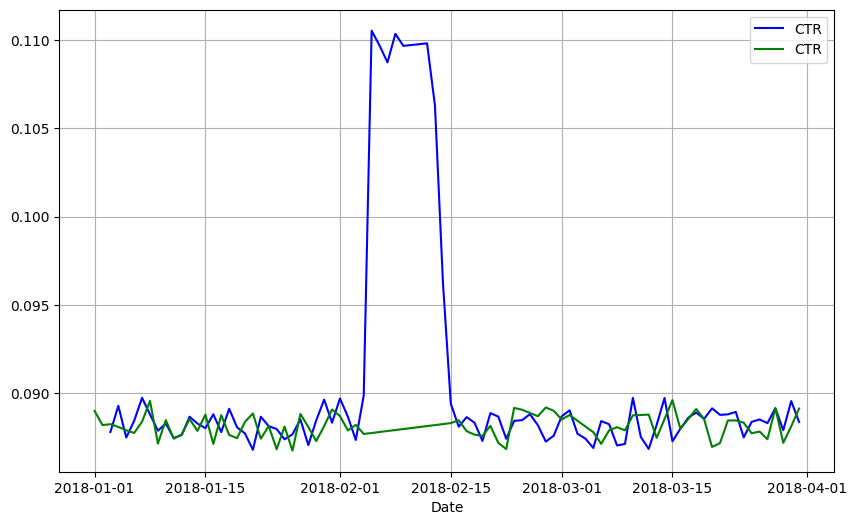

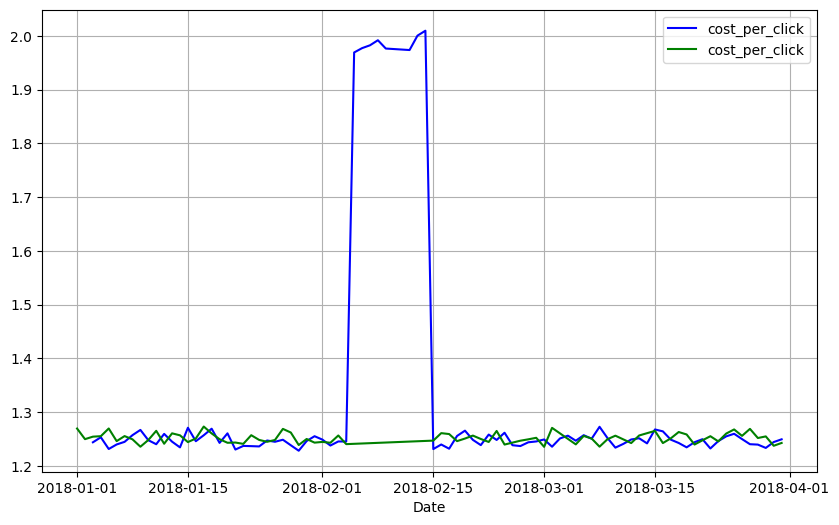

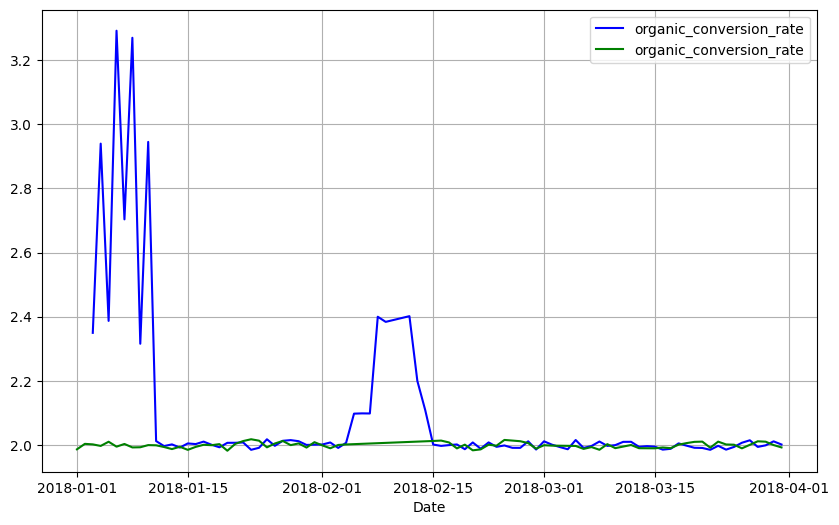

In [ ]:

data_B = data[data['retailer']=='B']
data_A = data[data['retailer']=='A']
num_cols = ['paid_clicks', 'paid_impressions', 'paid_ad_revenue', 'organic_page_views', 'organic_transactions', 'organic_sales_units', 'organic_sales_revenue','CTR','cost_per_click','organic_conversion_rate']

data_B = data_B.sort_values('date')
data_A = data_A.sort_values('date')
for cols in num_cols:

  plt.figure(figsize=(10, 6))
  plt.plot(data_B['date'], data_B[cols], label=cols, color='blue')
  plt.plot(data_A['date'], data_A[cols], label=cols, color='green')

  plt.xlabel('Date')
  plt.legend()
  plt.grid(True)
  plt.show()

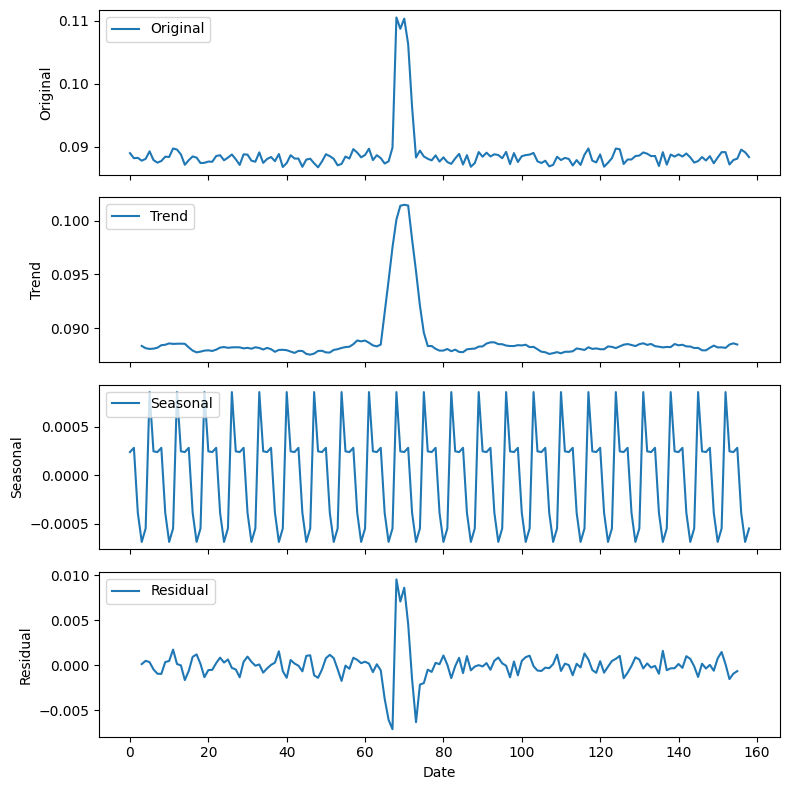

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


cumulative_metric = 'CTR'

result = seasonal_decompose(data[cumulative_metric], model='additive', period=7)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 8), sharex=True)

ax1.plot(data.index, data[cumulative_metric], label='Original')
ax1.legend(loc='upper left')
ax1.set_ylabel('Original')

ax2.plot(data.index, result.trend, label='Trend')
ax2.legend(loc='upper left')
ax2.set_ylabel('Trend')

ax3.plot(data.index, result.seasonal, label='Seasonal')
ax3.legend(loc='upper left')
ax3.set_ylabel('Seasonal')

ax4.plot(data.index, result.resid, label='Residual')
ax4.legend(loc='upper left')
ax4.set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

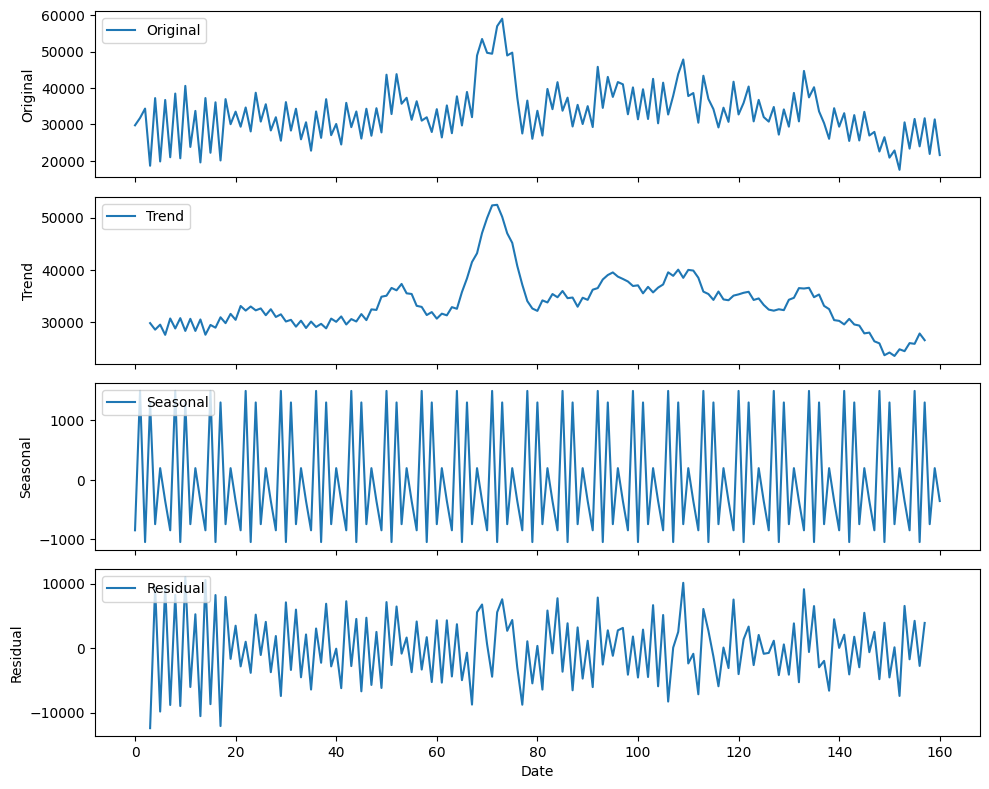

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


cumulative_metric = 'paid_ad_revenue'

result = seasonal_decompose(data[cumulative_metric], model='additive', period=7)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

ax1.plot(data.index, data[cumulative_metric], label='Original')
ax1.legend(loc='upper left')
ax1.set_ylabel('Original')

ax2.plot(data.index, result.trend, label='Trend')
ax2.legend(loc='upper left')
ax2.set_ylabel('Trend')

ax3.plot(data.index, result.seasonal, label='Seasonal')
ax3.legend(loc='upper left')
ax3.set_ylabel('Seasonal')

ax4.plot(data.index, result.resid, label='Residual')
ax4.legend(loc='upper left')
ax4.set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

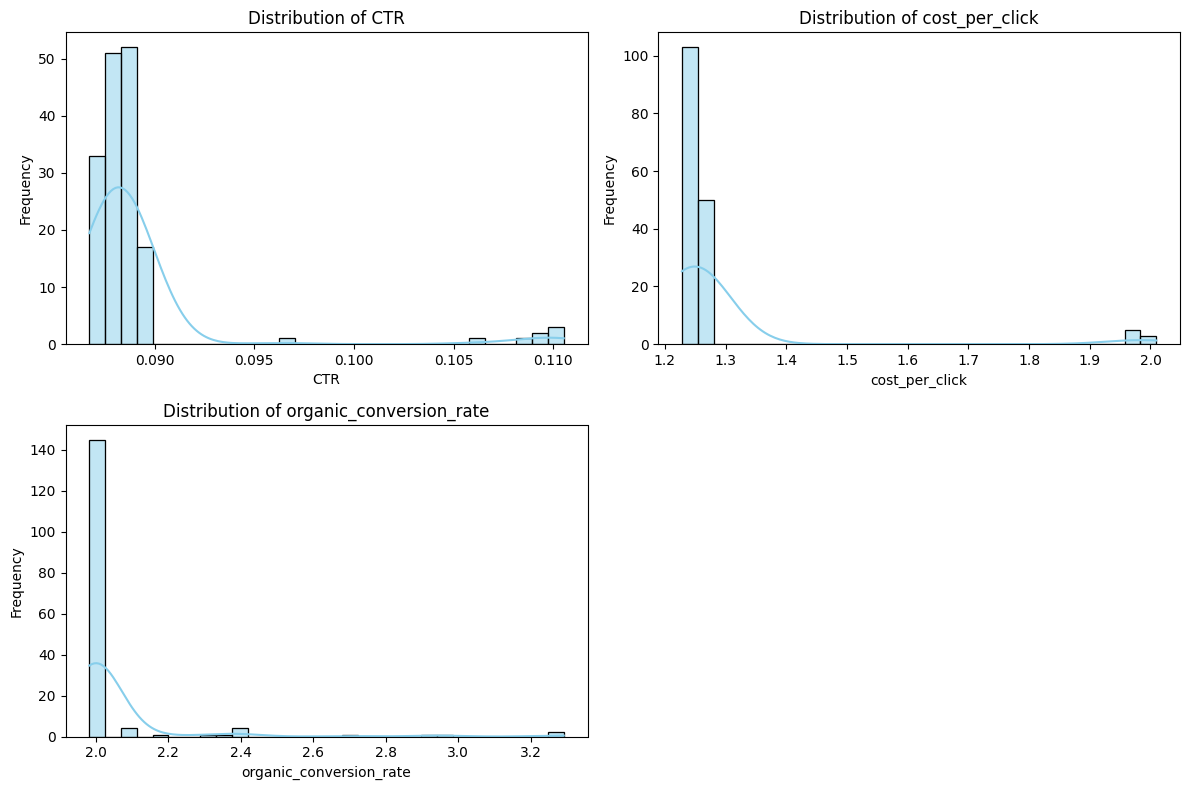

In [ ]:
metrics_to_plot = ['CTR', 'cost_per_click','organic_conversion_rate']

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[metric], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
cpc_data = data['cost_per_click']

mean_cpc = cpc_data.mean()
median_cpc = cpc_data.median()
std_dev_cpc = cpc_data.std()

print(f"Mean CPC: {mean_cpc}")
print(f"Median CPC: {median_cpc}")
print(f"Standard Deviation CPC: {std_dev_cpc}")

Mean CPC: 1.285767880578976
Median CPC: 1.248967694923488
Standard Deviation CPC: 0.1607488564007732


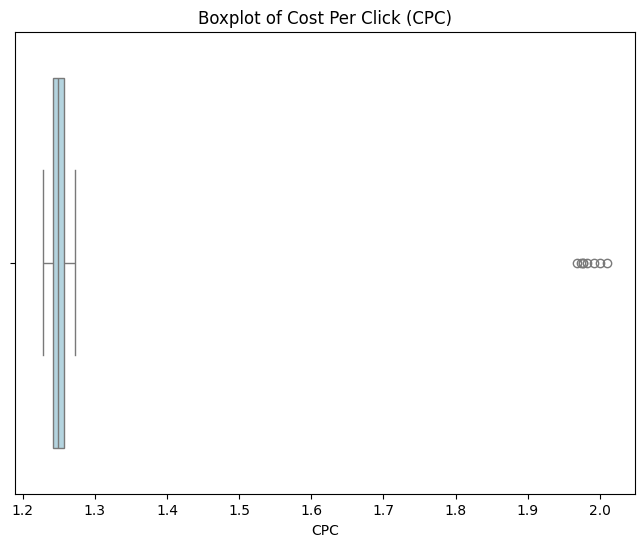

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=cpc_data, color='lightblue')
plt.title('Boxplot of Cost Per Click (CPC)')
plt.xlabel('CPC')
plt.show()

In [ ]:
quantiles = [0.25, 0.5, 0.75]
cpc_quantiles = cpc_data.quantile(quantiles)

for q, value in zip(quantiles, cpc_quantiles):
    print(f"{int(q*100)}th Percentile: {value}")

25th Percentile: 1.2425117714557037
50th Percentile: 1.248967694923488
75th Percentile: 1.256942015807512


In [ ]:
q1 = cpc_data.quantile(0.25)
q3 = cpc_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = cpc_data[(cpc_data < lower_bound) | (cpc_data > upper_bound)]
print("Potential Outliers:")
print(outliers)

Potential Outliers:
68    1.969146
69    1.977194
70    1.982489
71    1.991902
72    1.976460
73    1.973670
74    2.000449
75    2.009615
Name: cost_per_click, dtype: float64


In [ ]:
np.mean(outliers)

1.98511576408197

In [ ]:
df_with_retailer = data[['cost_per_click', 'retailer']]

q1 = df_with_retailer['cost_per_click'].quantile(0.25)
q3 = df_with_retailer['cost_per_click'].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_with_retailer[(df_with_retailer['cost_per_click'] < lower_bound) | (df_with_retailer['cost_per_click'] > upper_bound)]
print("Potential Outliers:")
print(outliers)

Potential Outliers:
    cost_per_click retailer
68        1.969146        B
69        1.977194        B
70        1.982489        B
71        1.991902        B
72        1.976460        B
73        1.973670        B
74        2.000449        B
75        2.009615        B


Mean CPI: 0.08916513006040157
Median CPI: 0.08828888843390593
Standard Deviation CPI: 0.004420504465219908


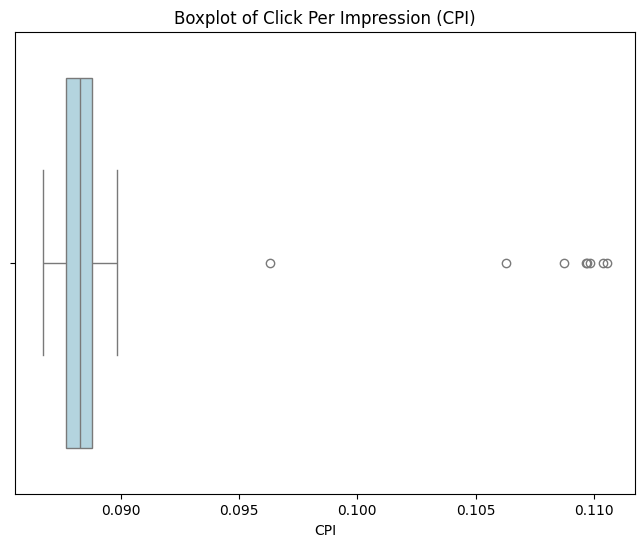

25th Percentile: 0.08767471733287473
50th Percentile: 0.08828888843390593
75th Percentile: 0.08878522947624012
Potential Outliers:
68    0.110532
69    0.109694
70    0.108739
71    0.110356
72    0.109674
73    0.109817
74    0.106282
75    0.096316
Name: CTR, dtype: float64


In [ ]:
cpi_data = data['CTR']

mean_cpi = cpi_data.mean()
median_cpi = cpi_data.median()
std_dev_cpi = cpi_data.std()

print(f"Mean CPI: {mean_cpi}")
print(f"Median CPI: {median_cpi}")
print(f"Standard Deviation CPI: {std_dev_cpi}")

plt.figure(figsize=(8, 6))
sns.boxplot(x=cpi_data, color='lightblue')
plt.title('Boxplot of Click Per Impression (CPI)')
plt.xlabel('CPI')
plt.show()

quantiles = [0.25, 0.5, 0.75]
cpi_quantiles = cpi_data.quantile(quantiles)

for q, value in zip(quantiles, cpi_quantiles):
    print(f"{int(q*100)}th Percentile: {value}")

q1 = cpi_data.quantile(0.25)
q3 = cpi_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = cpi_data[(cpi_data < lower_bound) | (cpi_data > upper_bound)]
print("Potential Outliers:")
print(outliers)

In [ ]:
np.mean(outliers)

0.10767624498598322

In [ ]:

df_with_retailer = data[['CTR', 'retailer']]

q1 = df_with_retailer['CTR'].quantile(0.25)
q3 = df_with_retailer['CTR'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_with_retailer[(df_with_retailer['CTR'] < lower_bound) | (df_with_retailer['CTR'] > upper_bound)]
print("Potential Outliers:")
print(outliers)

Potential Outliers:
         CTR retailer
68  0.110532        B
69  0.109694        B
70  0.108739        B
71  0.110356        B
72  0.109674        B
73  0.109817        B
74  0.106282        B
75  0.096316        B


Mean CR: 2.0490495165570803
Median CR: 2.000556187561214
Standard Deviation CR: 0.19518078698847596


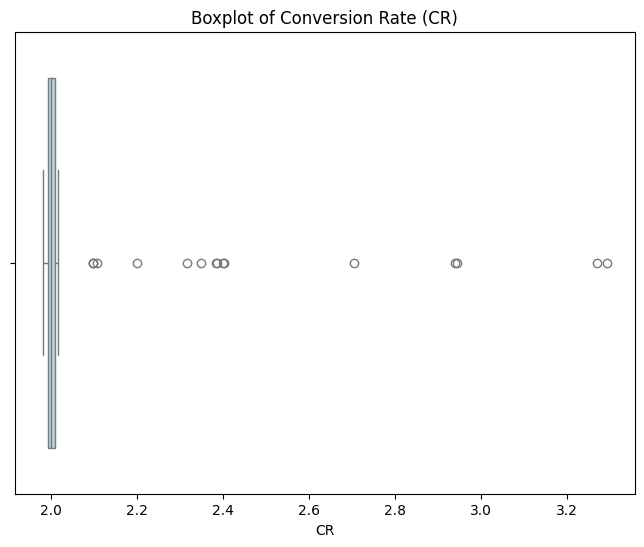

25th Percentile: 1.9927454515987548
50th Percentile: 2.000556187561214
75th Percentile: 2.009959461238974
Potential Outliers:
3     2.349517
5     2.939600
7     2.386796
9     3.291716
11    2.703427
13    3.269713
15    2.315557
17    2.944999
68    2.097546
69    2.098392
70    2.098103
71    2.399751
72    2.383769
73    2.401571
74    2.199631
75    2.108122
Name: organic_conversion_rate, dtype: float64


In [ ]:
conversion_rate_data = data['organic_conversion_rate']

mean_cr = conversion_rate_data.mean()
median_cr = conversion_rate_data.median()
std_dev_cr = conversion_rate_data.std()

print(f"Mean CR: {mean_cr}")
print(f"Median CR: {median_cr}")
print(f"Standard Deviation CR: {std_dev_cr}")

plt.figure(figsize=(8, 6))
sns.boxplot(x=conversion_rate_data, color='lightblue')
plt.title('Boxplot of Conversion Rate (CR)')
plt.xlabel('CR')
plt.show()

quantiles = [0.25, 0.5, 0.75]
cr_quantiles = conversion_rate_data.quantile(quantiles)

for q, value in zip(quantiles, cr_quantiles):
    print(f"{int(q*100)}th Percentile: {value}")

q1 = conversion_rate_data.quantile(0.25)
q3 = conversion_rate_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = conversion_rate_data[(conversion_rate_data < lower_bound) | (conversion_rate_data > upper_bound)]
print("Potential Outliers:")
print(outliers)

In [ ]:
df_with_retailer = data[['organic_conversion_rate', 'retailer']]

q1 = df_with_retailer['organic_conversion_rate'].quantile(0.25)
q3 = df_with_retailer['organic_conversion_rate'].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_with_retailer[(df_with_retailer['organic_conversion_rate'] < lower_bound) | (df_with_retailer['organic_conversion_rate'] > upper_bound)]
print("Potential Outliers:")
print(outliers)

Potential Outliers:
    organic_conversion_rate retailer
3                  2.349517        B
5                  2.939600        B
7                  2.386796        B
9                  3.291716        B
11                 2.703427        B
13                 3.269713        B
15                 2.315557        B
17                 2.944999        B
68                 2.097546        B
69                 2.098392        B
70                 2.098103        B
71                 2.399751        B
72                 2.383769        B
73                 2.401571        B
74                 2.199631        B
75                 2.108122        B


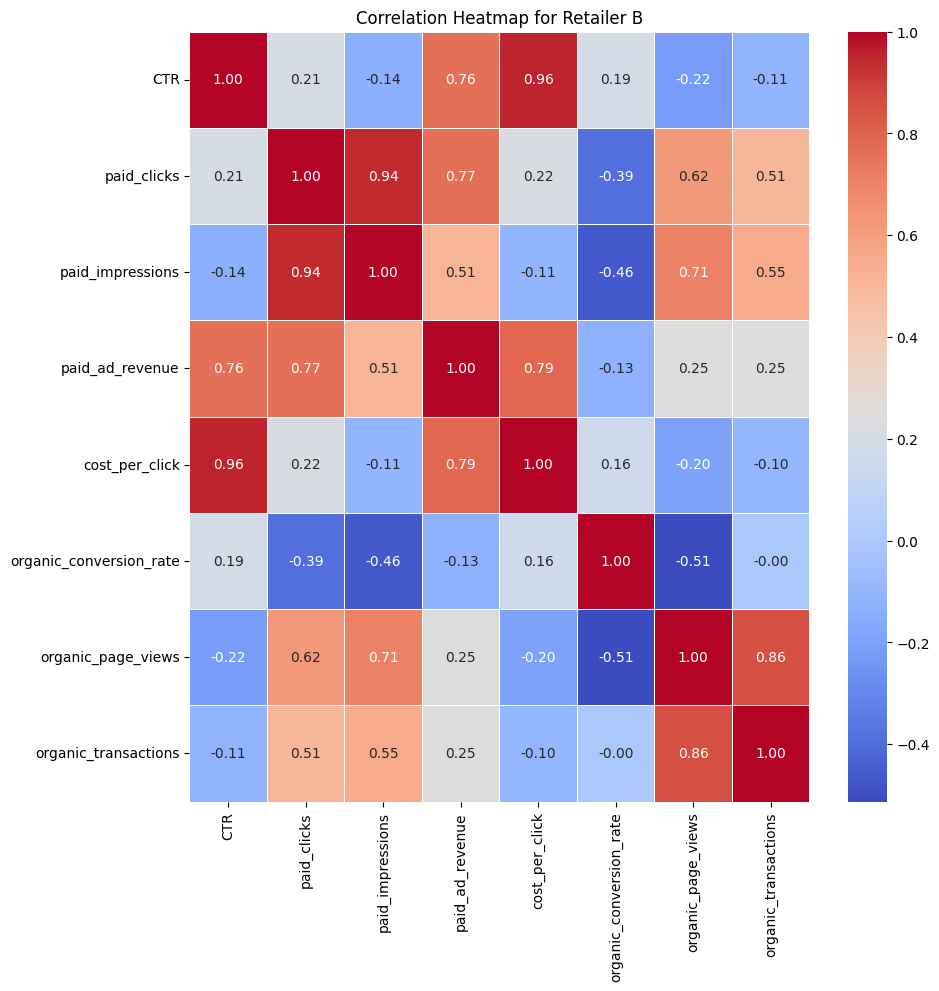

In [ ]:
data_B = data[data['retailer']=='B']
derived_columns = ['CTR','paid_clicks','paid_impressions','paid_ad_revenue','cost_per_click','organic_conversion_rate','organic_page_views','organic_transactions']

selected_data = data_B[derived_columns]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Retailer B')
plt.show()

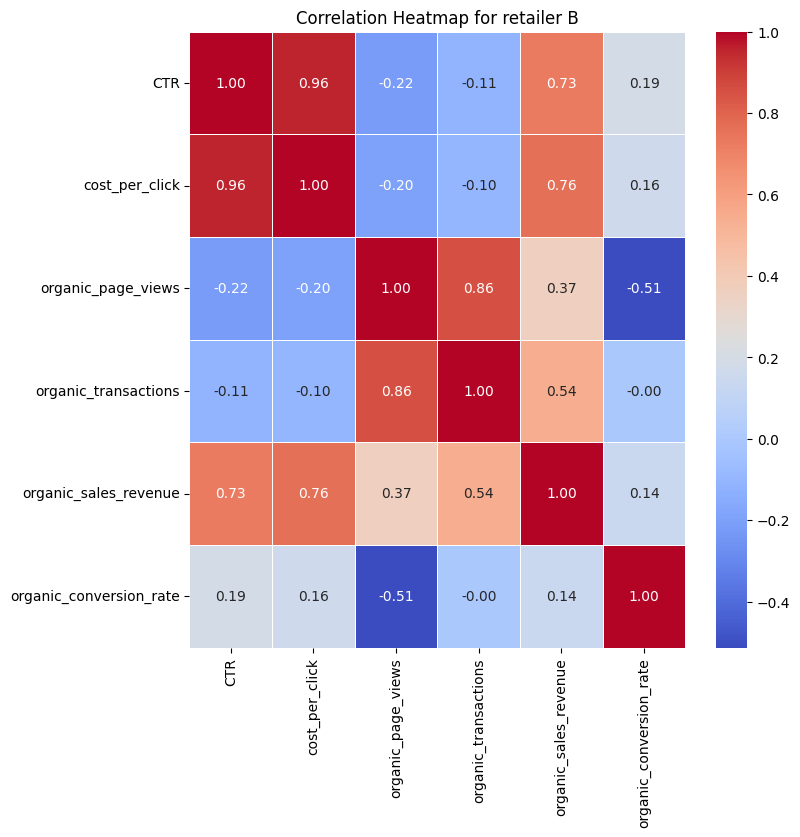

In [ ]:
data_B = data[data['retailer']=='B']
derived_columns = ['CTR','cost_per_click','organic_page_views','organic_transactions','organic_sales_revenue','organic_conversion_rate']

selected_data = data_B[derived_columns]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for retailer B')
plt.show()

# Hypothesis Testing

In [ ]:
#Null Hypothesis (H0): There is no correlation between CPC and CTR.
#Alternative Hypothesis (H1): There is a significant correlation between CPC and CTR.

In [ ]:
α = 0.05

from scipy.stats import pearsonr


cpc_data = data['cost_per_click']
CTR_data = data['CTR']

correlation_coefficient, p_value = pearsonr(cpc_data, CTR_data)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.9545007361477232
P-value: 1.8587288968599994e-85


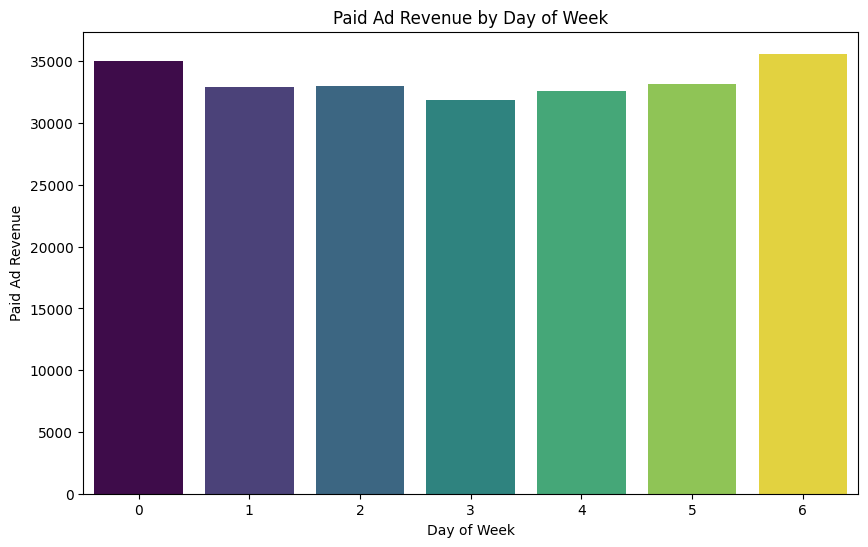

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='paid_ad_revenue', hue ='day_of_week', data=data,errorbar=None , palette='viridis',legend=False)
plt.title('Paid Ad Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Paid Ad Revenue')
plt.show()

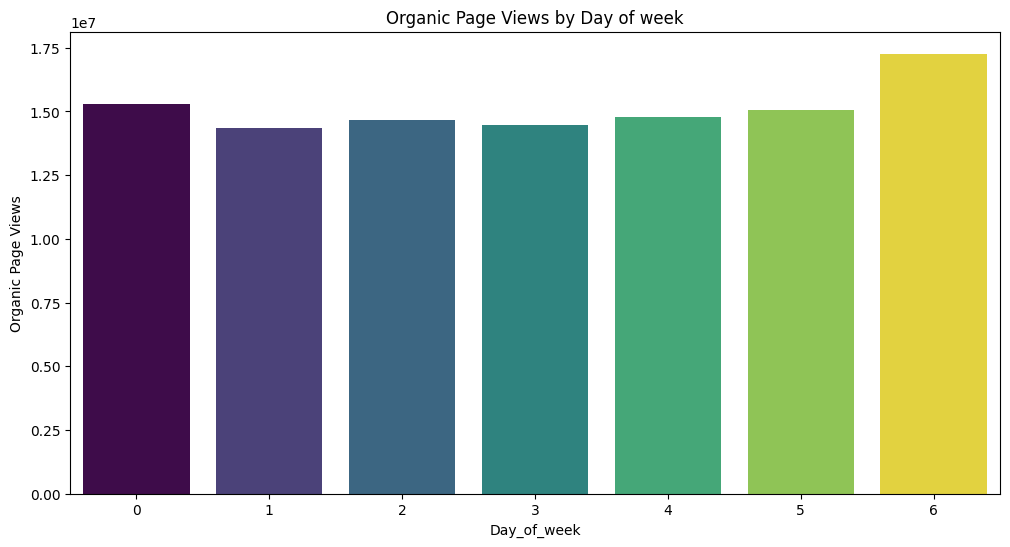

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='organic_page_views', data=data, hue='day_of_week',  errorbar=None, palette='viridis',legend=False)
plt.title('Organic Page Views by Day of week')
plt.xlabel('Day_of_week')
plt.ylabel('Organic Page Views')
plt.show()

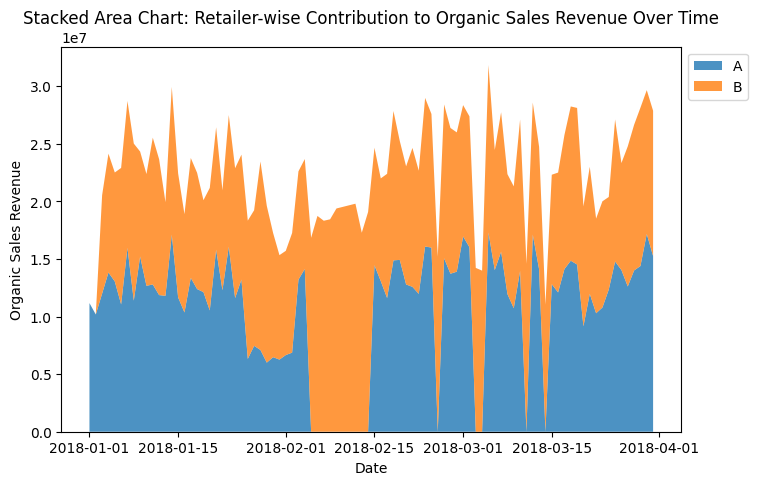

In [ ]:
data['date'] = pd.to_datetime(data['date'])
retailer_revenue = data.pivot_table(index='date', columns='retailer', values='organic_sales_revenue', aggfunc='sum', fill_value=0)

plt.figure(figsize=(8, 5))
plt.stackplot(retailer_revenue.index, retailer_revenue.values.T, labels=retailer_revenue.columns, alpha=0.8)
plt.title('Stacked Area Chart: Retailer-wise Contribution to Organic Sales Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Organic Sales Revenue')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Text(0, 0.5, 'Weekly CR')

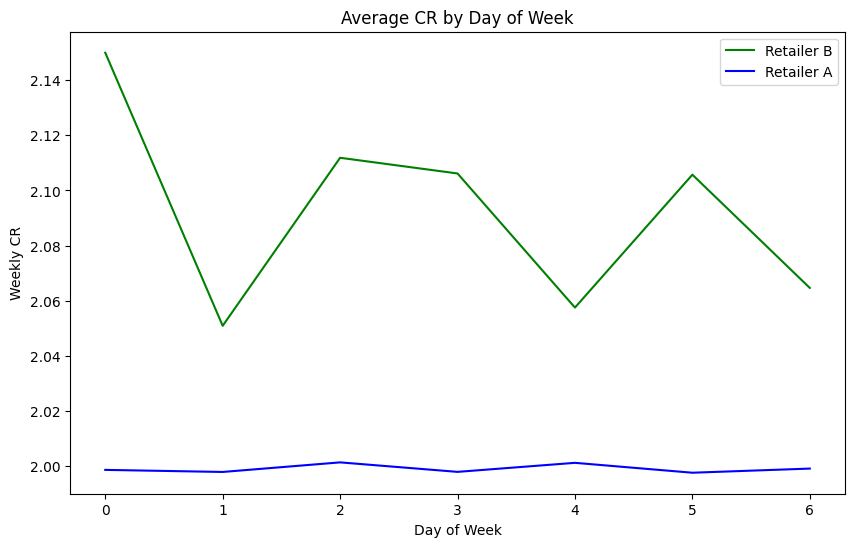

In [ ]:
weekly_organic_cr = data.groupby(['day_of_week', 'retailer'])['organic_conversion_rate'].mean().reset_index()
weekly_organic_cr_B = weekly_organic_cr[weekly_organic_cr['retailer']=='B']
weekly_organic_cr_A = weekly_organic_cr[weekly_organic_cr['retailer']=='A']


plt.figure(figsize=(10, 6))


sns.lineplot(x='day_of_week', y='organic_conversion_rate', data=weekly_organic_cr_B, color='green', label='Retailer B')


sns.lineplot(x='day_of_week', y='organic_conversion_rate', data=weekly_organic_cr_A, color='blue', label='Retailer A')


plt.title('Average CR by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Weekly CR')


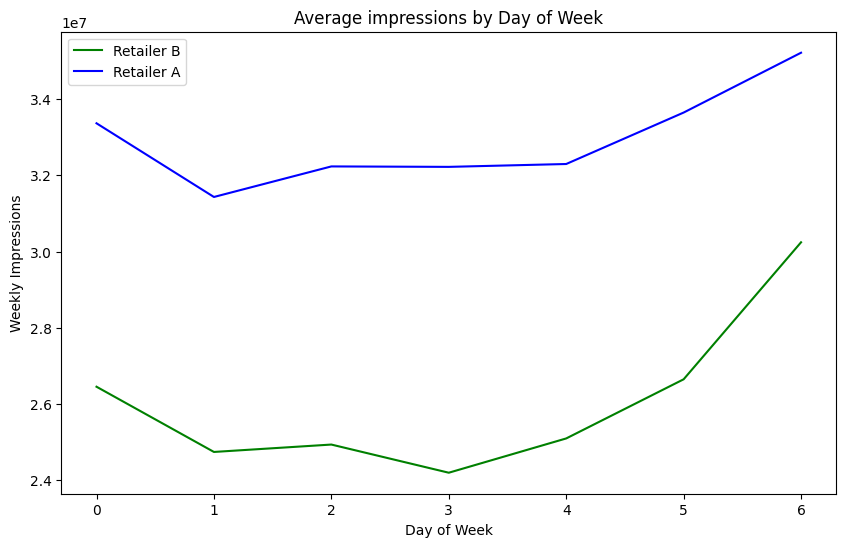

In [ ]:
weekly_paid_impressions = data.groupby(['day_of_week', 'retailer'])['paid_impressions'].mean().reset_index()
weekly_paid_impressions_B = weekly_paid_impressions[weekly_paid_impressions['retailer']=='B']
weekly_paid_impressions_A = weekly_paid_impressions[weekly_paid_impressions['retailer']=='A']


plt.figure(figsize=(10, 6))


sns.lineplot(x='day_of_week', y='paid_impressions', data=weekly_paid_impressions_B, color='green', label='Retailer B')


sns.lineplot(x='day_of_week', y='paid_impressions', data=weekly_paid_impressions_A, color='blue', label='Retailer A')


plt.title('Average impressions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Weekly Impressions')


plt.legend()


plt.show()

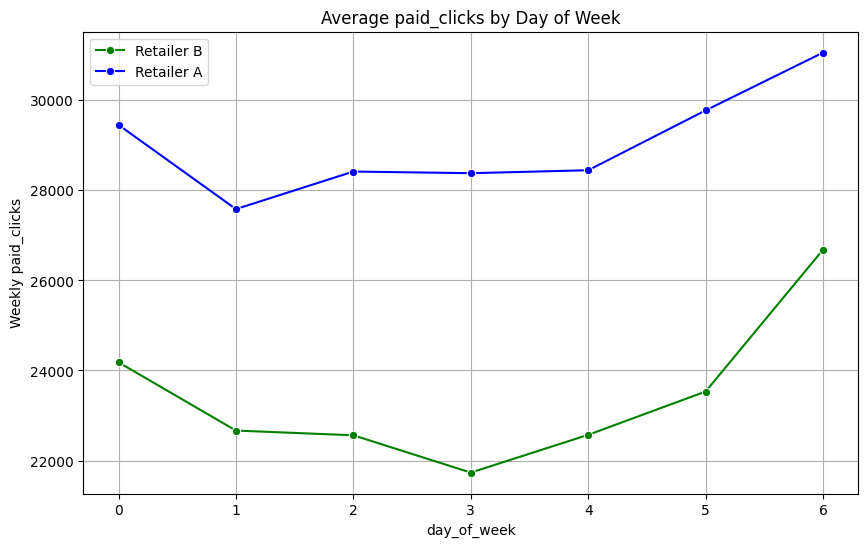

In [ ]:
weekly_paid_clicks = data.groupby(['day_of_week','retailer'])['paid_clicks'].mean().reset_index()
weekly_paid_clicks_B = weekly_paid_clicks[weekly_paid_clicks['retailer']=='B']
weekly_paid_clicks_A = weekly_paid_clicks[weekly_paid_clicks['retailer']=='A']

plt.figure(figsize=(10, 6))

sns.lineplot(x='day_of_week', y='paid_clicks', data=weekly_paid_clicks_B, marker='o', color='green', label='Retailer B')

sns.lineplot(x='day_of_week', y='paid_clicks', data=weekly_paid_clicks_A, marker='o', color='blue', label='Retailer A')

plt.title('Average paid_clicks by Day of Week')
plt.xlabel('day_of_week')
plt.ylabel('Weekly paid_clicks')
plt.grid(True)
plt.legend()
plt.show()

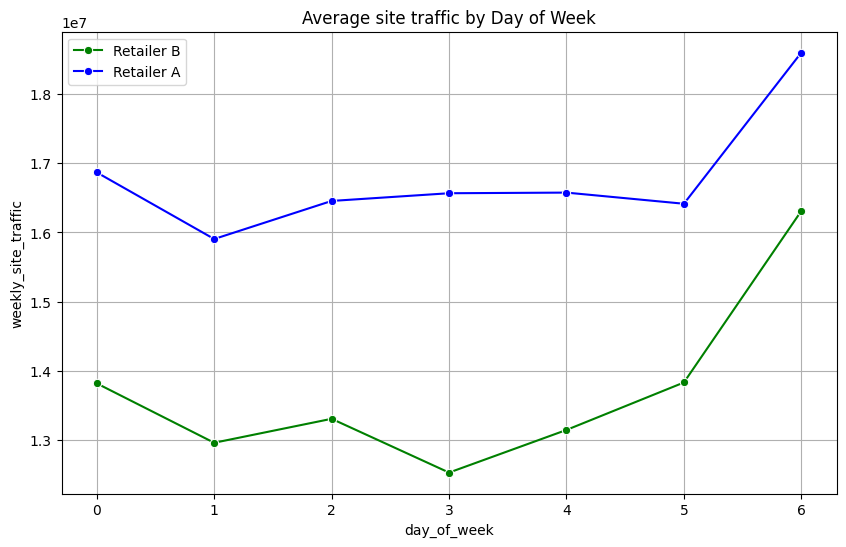

In [ ]:
weekly_site_traffic = data.groupby(['day_of_week','retailer'])['organic_page_views'].mean().reset_index()
weekly_site_traffic_B = weekly_site_traffic[weekly_site_traffic['retailer']=='B']
weekly_site_traffic_A = weekly_site_traffic[weekly_site_traffic['retailer']=='A']

plt.figure(figsize=(10, 6))

sns.lineplot(x='day_of_week', y='organic_page_views', data=weekly_site_traffic_B, marker='o', color='green', label='Retailer B')

sns.lineplot(x='day_of_week', y='organic_page_views', data=weekly_site_traffic_A, marker='o', color='blue', label='Retailer A')

plt.title('Average site traffic by Day of Week')
plt.xlabel('day_of_week')
plt.ylabel('weekly_site_traffic')
plt.grid(True)
plt.show()

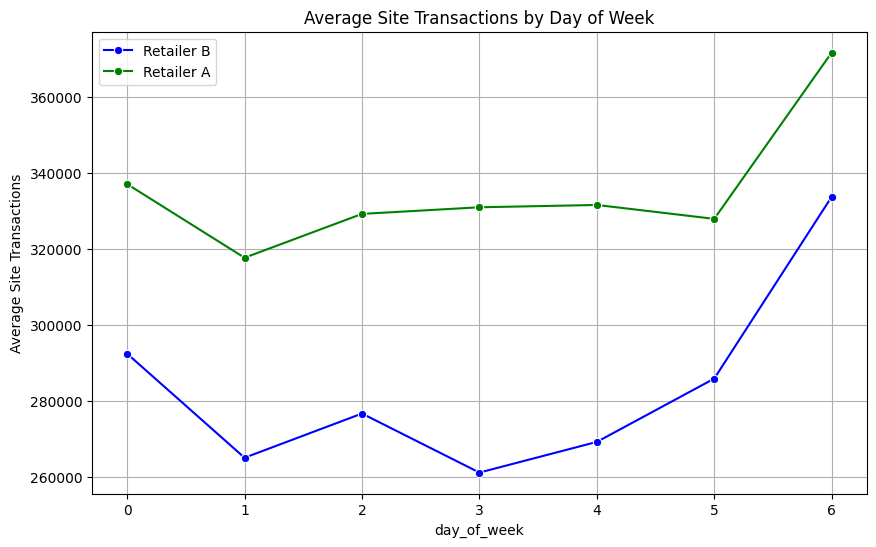

In [ ]:
weekly_site_transactions = data.groupby(['day_of_week','retailer'])['organic_transactions'].mean().reset_index()
weekly_site_transactions_B = weekly_site_transactions[weekly_site_transactions['retailer']=='B']
weekly_site_transactions_A = weekly_site_transactions[weekly_site_transactions['retailer']=='A']
plt.figure(figsize=(10, 6))

sns.lineplot(x='day_of_week', y='organic_transactions', data=weekly_site_transactions_B, marker='o', color='blue', label='Retailer B')

sns.lineplot(x='day_of_week', y='organic_transactions', data=weekly_site_transactions_A, marker='o', color='green', label='Retailer A')

plt.title('Average Site Transactions by Day of Week')
plt.xlabel('day_of_week')
plt.ylabel('Average Site Transactions')
plt.grid(True)
plt.show()

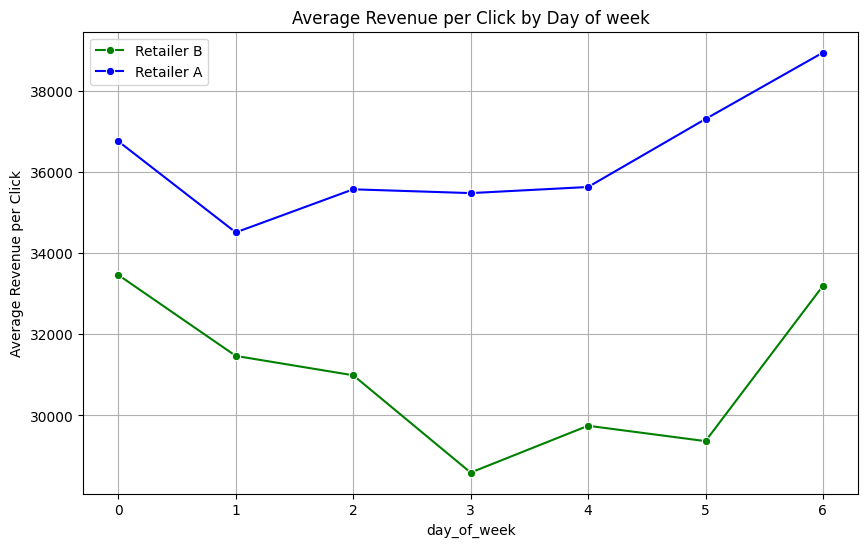

In [ ]:
weekly_revenue_per_click = data.groupby(['day_of_week','retailer'])['paid_ad_revenue'].mean().reset_index()
weekly_revenue_per_click_B = weekly_revenue_per_click[weekly_revenue_per_click['retailer']=='B']
weekly_revenue_per_click_A = weekly_revenue_per_click[weekly_revenue_per_click['retailer']=='A']

plt.figure(figsize=(10, 6))

sns.lineplot(x='day_of_week', y='paid_ad_revenue', data=weekly_revenue_per_click_B, marker='o', color='green', label='Retailer B')

sns.lineplot(x='day_of_week', y='paid_ad_revenue', data=weekly_revenue_per_click_A, marker='o', color='blue', label='Retailer A')

plt.title('Average Revenue per Click by Day of week')
plt.xlabel('day_of_week')
plt.ylabel('Average Revenue per Click')
plt.grid(True)
plt.show()

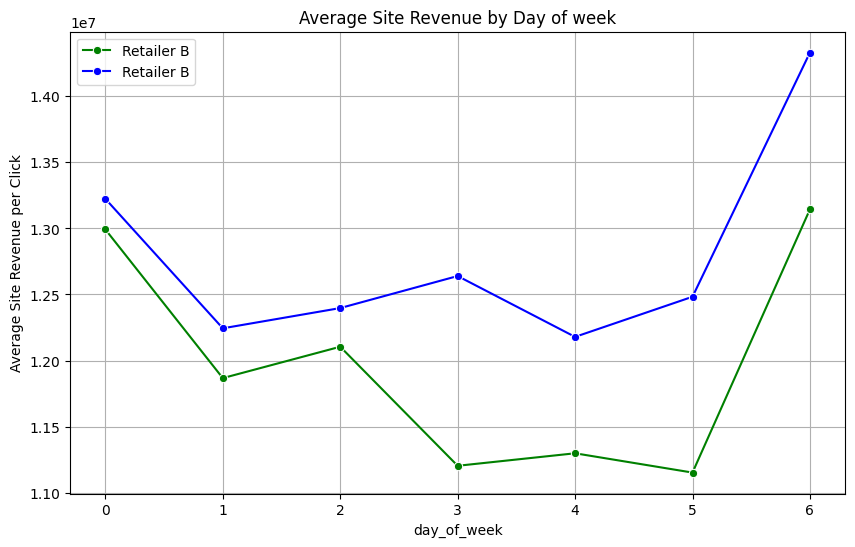

In [ ]:
weekly_site_revenue = data.groupby(['day_of_week','retailer'])['organic_sales_revenue'].mean().reset_index()
weekly_revenue_per_click_B = weekly_site_revenue[weekly_site_revenue['retailer']=='B']
weekly_revenue_per_click_A = weekly_site_revenue[weekly_site_revenue['retailer']=='A']

plt.figure(figsize=(10, 6))

sns.lineplot(x='day_of_week', y='organic_sales_revenue', data=weekly_revenue_per_click_B, marker='o', color='green', label='Retailer B')

sns.lineplot(x='day_of_week', y='organic_sales_revenue', data=weekly_revenue_per_click_A, marker='o', color='blue', label='Retailer B')

plt.title('Average Site Revenue by Day of week')
plt.xlabel('day_of_week')
plt.ylabel('Average Site Revenue per Click')
plt.grid(True)
plt.show()

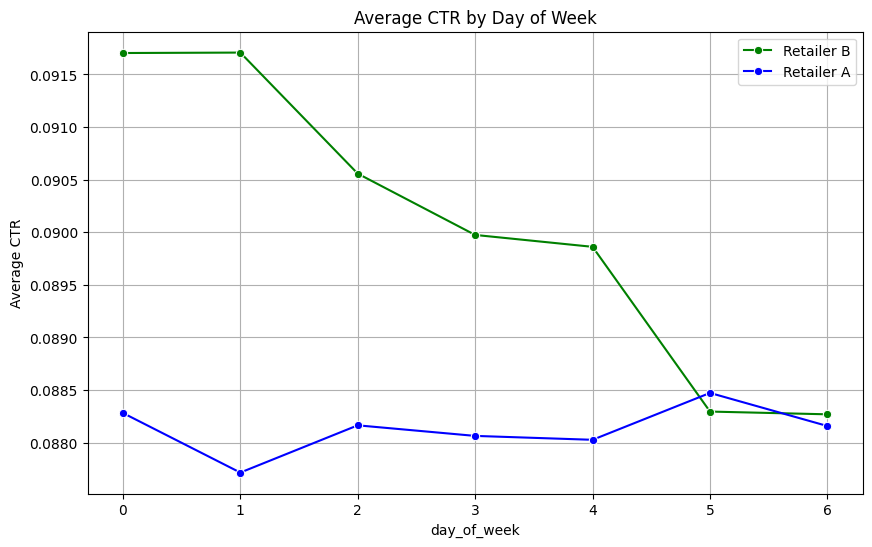

In [ ]:
weekly_ctr = data.groupby(['day_of_week','retailer'])['CTR'].mean().reset_index()
weekly_ctr_B = weekly_ctr[weekly_ctr['retailer']=='B']
weekly_ctr_A = weekly_ctr[weekly_ctr['retailer']=='A']
plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='CTR', data=weekly_ctr_B, marker='o', color='green', label='Retailer B')
sns.lineplot(x='day_of_week', y='CTR', data=weekly_ctr_A, marker='o', color='blue', label='Retailer A')
plt.title('Average CTR by Day of Week')
plt.xlabel('day_of_week')
plt.ylabel('Average CTR')
plt.grid(True)
plt.show()

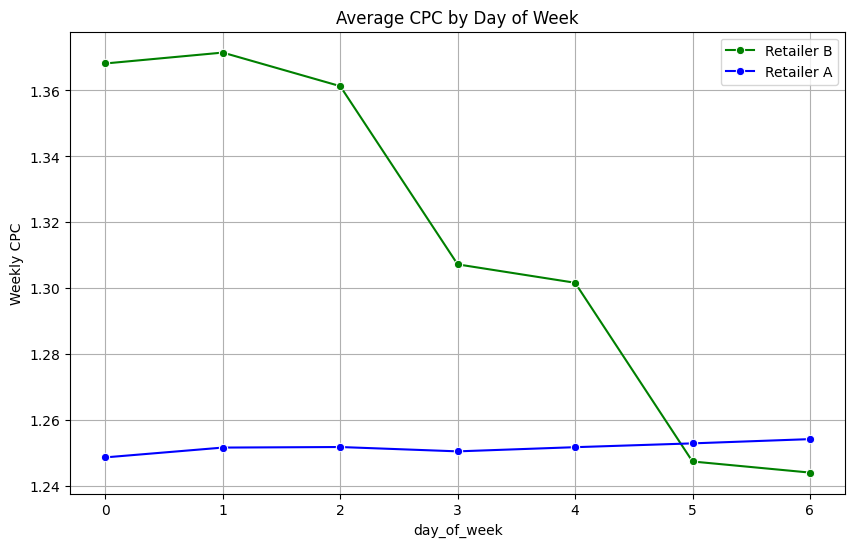

In [ ]:
weekly_cpc = data.groupby(['day_of_week','retailer'])['cost_per_click'].mean().reset_index()
weekly_cpc_B = weekly_cpc[weekly_cpc['retailer']=='B']
weekly_cpc_A = weekly_cpc[weekly_cpc['retailer']=='A']
plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='cost_per_click', data=weekly_cpc_B, marker='o', color='green',label='Retailer B')
sns.lineplot(x='day_of_week', y='cost_per_click', data=weekly_cpc_A, marker='o', color='blue', label='Retailer A')
plt.title('Average CPC by Day of Week')
plt.xlabel('day_of_week')
plt.ylabel('Weekly CPC')
plt.grid(True)
plt.show()

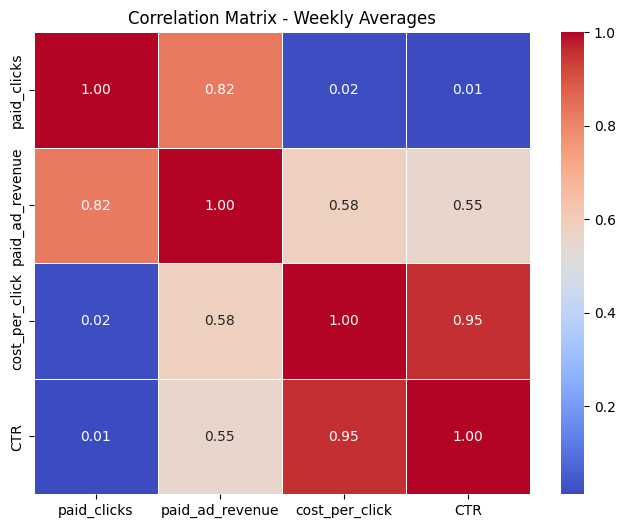

In [ ]:
weekly_averages = data[['paid_clicks', 'paid_ad_revenue', 'cost_per_click','CTR']]
correlation_matrix = weekly_averages.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix - Weekly Averages')
plt.show()


In [ ]:
corr, p_value = pearsonr(weekly_averages['paid_clicks'], weekly_averages['paid_ad_revenue'])
print(f'Correlation: {corr}, p-value: {p_value}')

Correlation: 0.8248614212947963, p-value: 3.1590068819106933e-41


In [ ]:
corr, p_value = pearsonr(weekly_averages['paid_clicks'], weekly_averages['cost_per_click'])
print(f'Correlation: {corr}, p-value: {p_value}')

Correlation: 0.01932544447682692, p-value: 0.8077540514202597


In [ ]:
corr, p_value = pearsonr(weekly_averages['cost_per_click'], weekly_averages['paid_ad_revenue'])
print(f'Correlation: {corr}, p-value: {p_value}')

Correlation: 0.5794624932363612, p-value: 8.059667988471631e-16


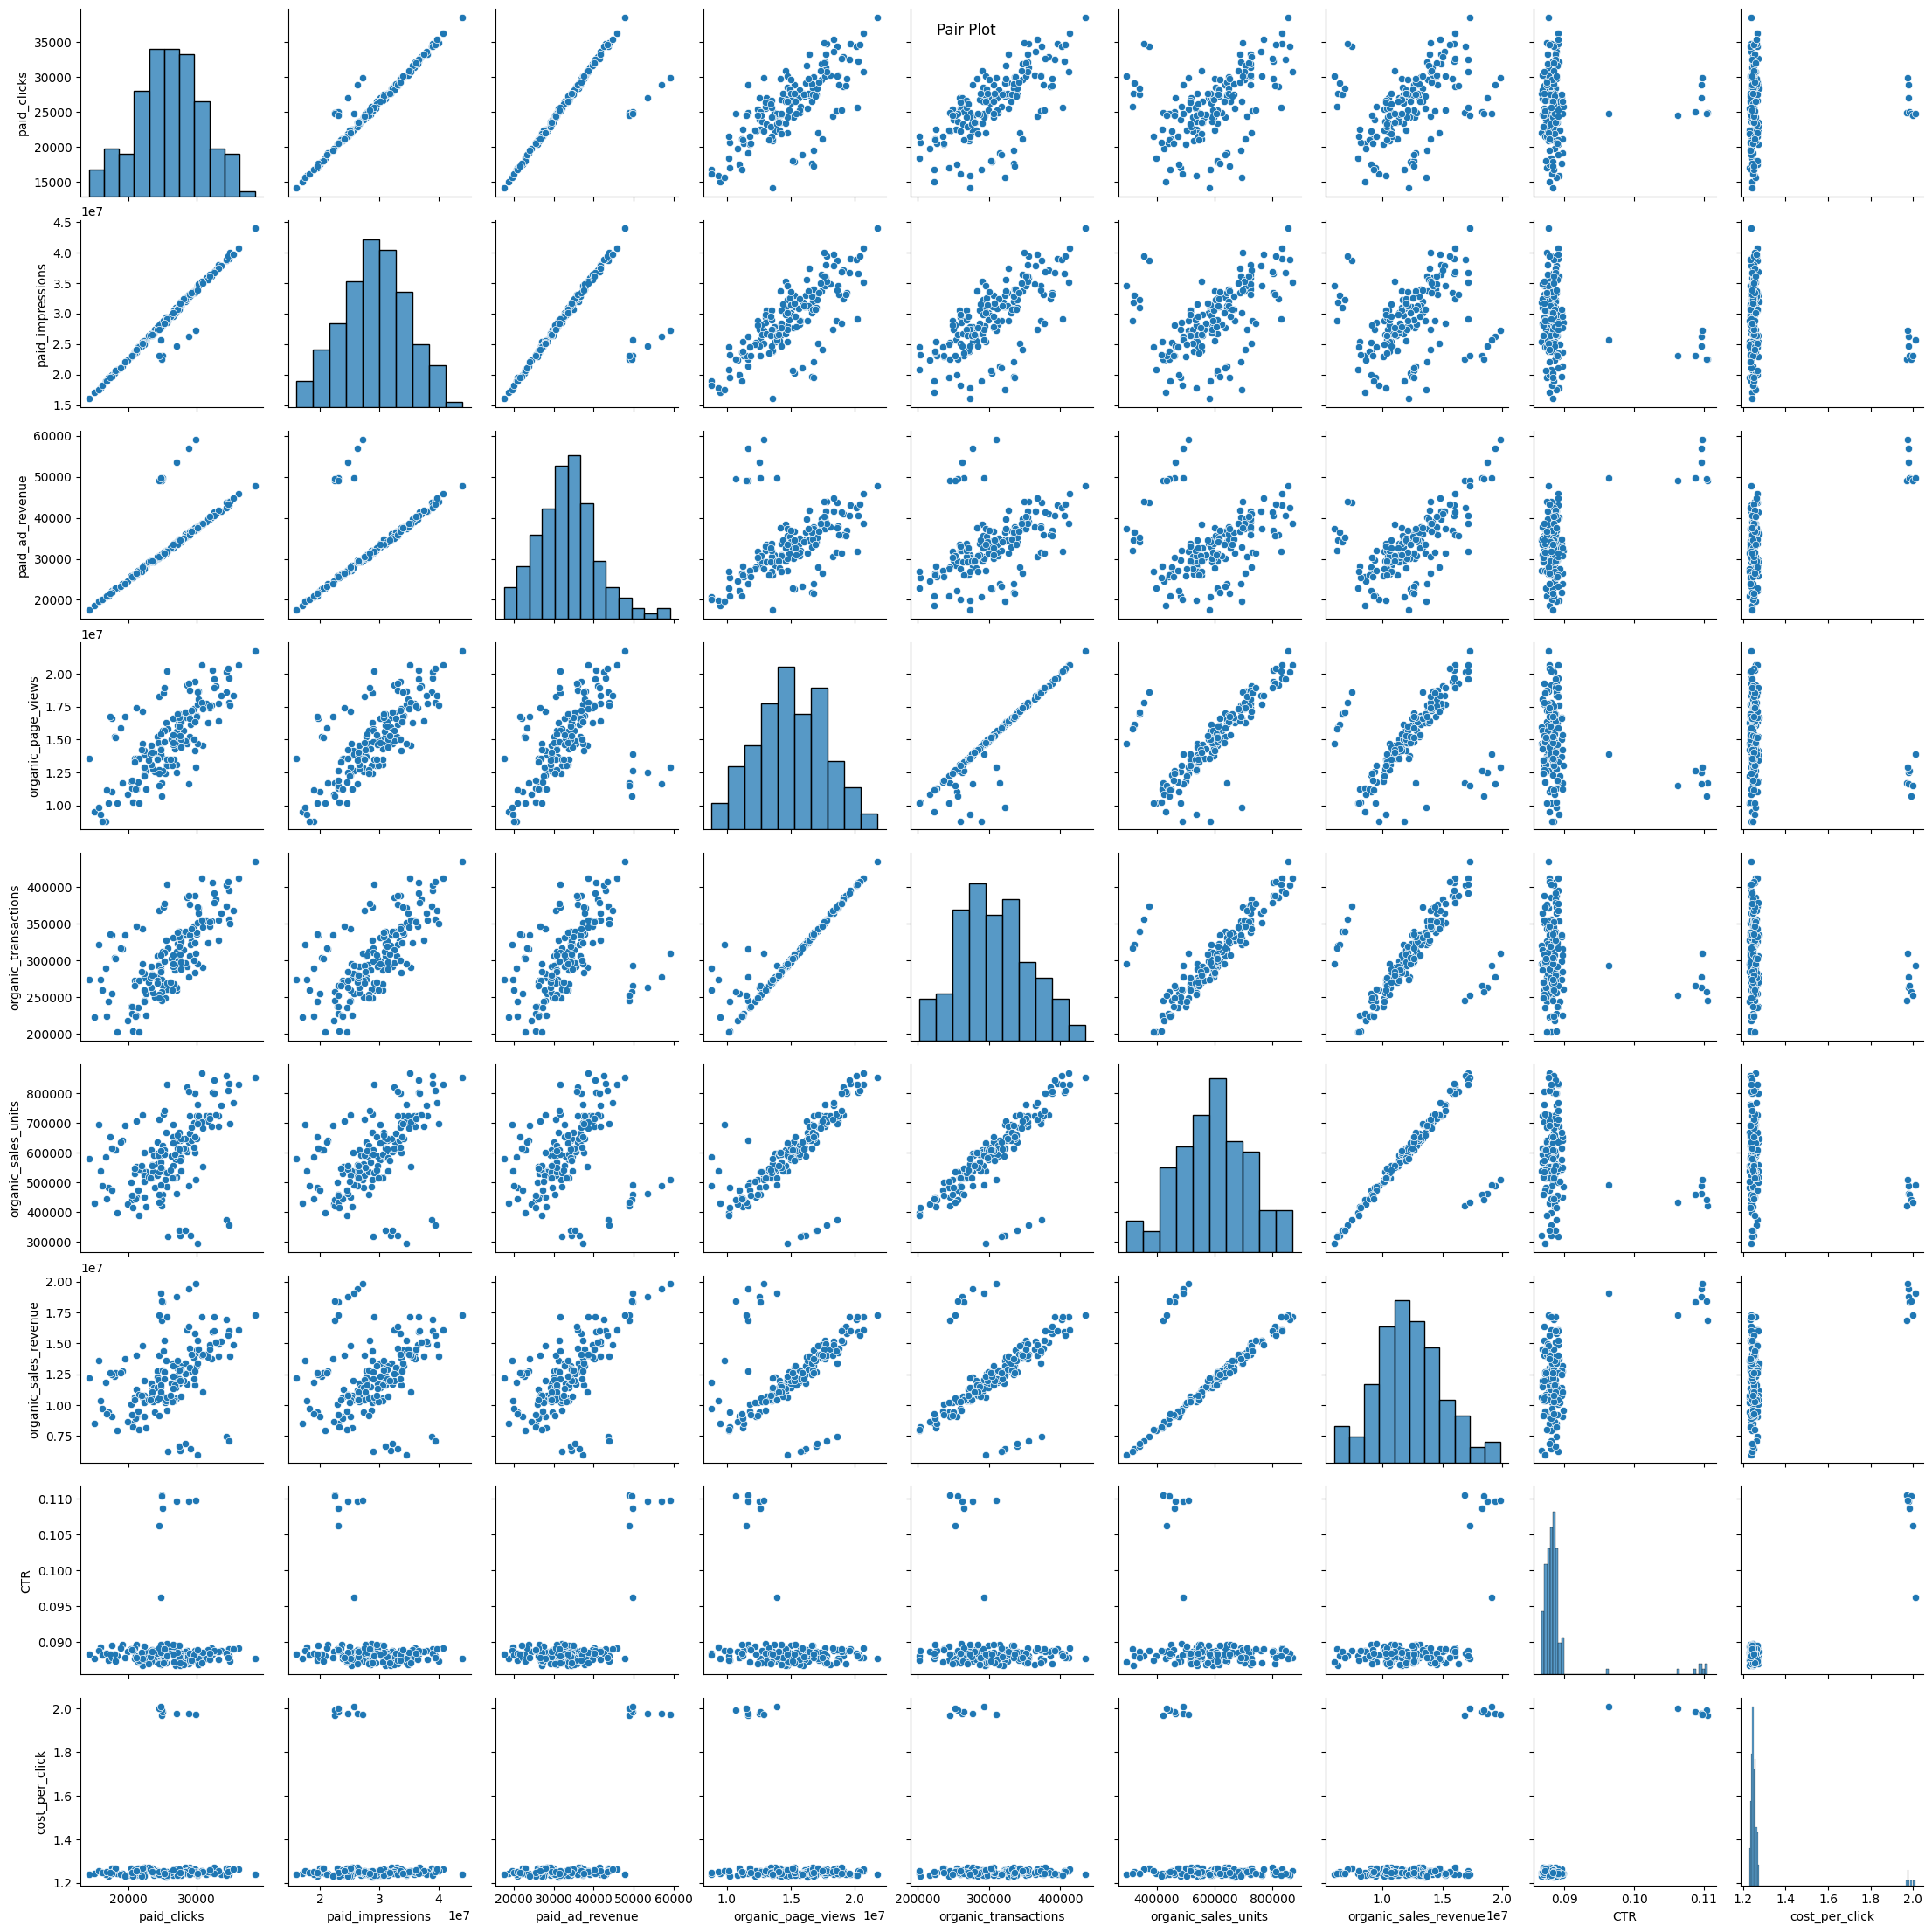

In [ ]:
selected_columns = [ 'paid_clicks', 'paid_impressions', 'paid_ad_revenue','organic_page_views', 'organic_transactions', 'organic_sales_units','organic_sales_revenue','CTR','cost_per_click']
pair_plot_data = data[selected_columns]

sns.pairplot(pair_plot_data)
plt.suptitle('Pair Plot')
plt.show()

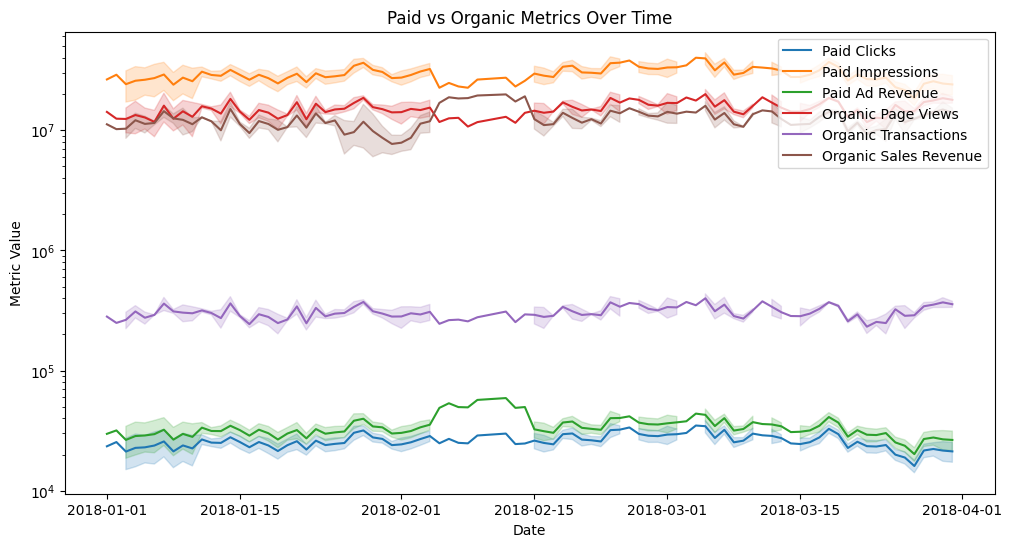

In [ ]:
plt.figure(figsize=(12, 6))

# Plot paid metrics
sns.lineplot(x='date', y='paid_clicks', data=data, label='Paid Clicks')
sns.lineplot(x='date', y='paid_impressions', data=data, label='Paid Impressions')
sns.lineplot(x='date', y='paid_ad_revenue', data=data, label='Paid Ad Revenue')

# Plot organic metrics
sns.lineplot(x='date', y='organic_page_views', data=data, label='Organic Page Views')
sns.lineplot(x='date', y='organic_transactions', data=data, label='Organic Transactions')
sns.lineplot(x='date', y='organic_sales_revenue', data=data, label='Organic Sales Revenue')

plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Paid vs Organic Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Metric Value')
plt.legend(loc='upper right')
plt.show()

In [ ]:
data['clicks_to_page_views_ratio'] = 0.0

# Step 3: Calculate the ratio
data['clicks_to_page_views_ratio'] = data['paid_clicks'] / data['organic_page_views']


print(data[['paid_clicks', 'organic_page_views', 'clicks_to_page_views_ratio']].head())

            paid_clicks  organic_page_views  clicks_to_page_views_ratio
date                                                                   
2018-01-01        23459            14157871                    0.001657
2018-01-02        25444            12434724                    0.002046
2018-01-03        27403            15261160                    0.001796
2018-01-03        15008             9487355                    0.001582
2018-01-04        29680            17361350                    0.001710


In [ ]:
data['Ratio_paid_organic_revenue'] = 0.0

# Step 3: Calculate the ratio
data['Ratio_paid_organic_revenue'] = data['paid_ad_revenue'] / data['organic_sales_revenue']


print(data[['paid_ad_revenue', 'organic_sales_revenue', 'Ratio_paid_organic_revenue']].head())

            paid_ad_revenue  organic_sales_revenue  Ratio_paid_organic_revenue
date                                                                          
2018-01-01            29778               11167429                    0.002667
2018-01-02            31795               10178081                    0.003124
2018-01-03            34370               11996719                    0.002865
2018-01-03            18666                8541566                    0.002185
2018-01-04            37251               13824771                    0.002695


<Axes: xlabel='date', ylabel='Ratio_paid_organic_revenue'>

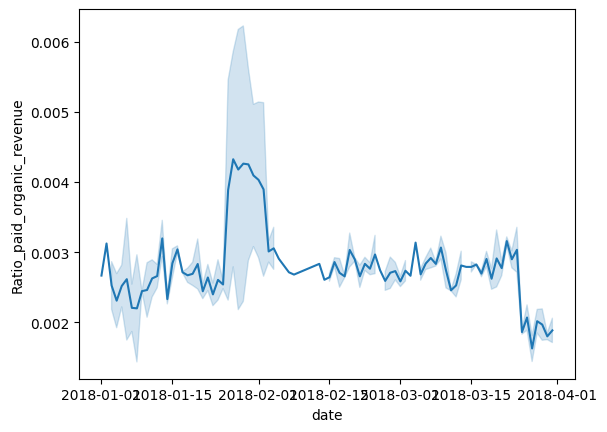

In [ ]:
sns.lineplot(data=data, x='date',y='Ratio_paid_organic_revenue')

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Step 1: Add a constant term for the intercept
data['intercept'] = 1.0

# Step 2: Fit a simple linear regression model
model = sm.OLS(data['organic_page_views'], data[['intercept', 'paid_clicks']])
results = model.fit()

# Step 3: Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     organic_page_views   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     219.6
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           1.23e-31
Time:                        11:35:09   Log-Likelihood:                -2515.1
No. Observations:                 159   AIC:                             5034.
Df Residuals:                     157   BIC:                             5040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    3.945e+06    7.7e+05      5.124      

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Step 1: Add a constant term for the intercept
data['intercept'] = 1.0

# Step 2: Fit a simple linear regression model
model = sm.OLS(data['organic_sales_revenue'], data[['intercept', 'paid_ad_revenue']])
results = model.fit()

# Step 3: Print the regression summary
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     organic_sales_revenue   R-squared:                       0.328
Model:                               OLS   Adj. R-squared:                  0.324
Method:                    Least Squares   F-statistic:                     76.60
Date:                   Sun, 28 Jan 2024   Prob (F-statistic):           3.11e-15
Time:                           11:40:07   Log-Likelihood:                -2547.9
No. Observations:                    159   AIC:                             5100.
Df Residuals:                        157   BIC:                             5106.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept   

In [ ]:
#Null Hypothesis (H0): Increased paid ad impressions have no effect on organic page views.
#Alternative Hypothesis (H1): Increased paid ad impressions lead to a subsequent rise in organic page views.

import statsmodels.api as sm

X = data['paid_impressions']
y = data['organic_page_views']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     organic_page_views   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     244.8
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           7.50e-34
Time:                        11:42:18   Log-Likelihood:                -2509.9
No. Observations:                 159   AIC:                             5024.
Df Residuals:                     157   BIC:                             5030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.978e+06   7.28e+05  

In [ ]:
from scipy.stats import pearsonr

paid_metric = data['paid_impressions']
organic_metric = data['organic_page_views']

correlation_coefficient, p_value = pearsonr(paid_metric, organic_metric)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")

Pearson Correlation Coefficient: 0.7805295345725741
P-value: 7.5042596711767e-34
Reject the null hypothesis: There is a significant correlation.


In [ ]:
from scipy.stats import pearsonr

paid_metric = data['paid_clicks']
organic_metric = data['organic_page_views']

correlation_coefficient, p_value = pearsonr(paid_metric, organic_metric)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")

Pearson Correlation Coefficient: 0.7636074825299635
P-value: 1.2339454626888569e-31
Reject the null hypothesis: There is a significant correlation.


In [ ]:
from scipy.stats import pearsonr

paid_metric = data['paid_ad_revenue']
organic_metric = data['organic_page_views']

correlation_coefficient, p_value = pearsonr(paid_metric, organic_metric)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")

Pearson Correlation Coefficient: 0.5943875957237625
P-value: 1.4612237456379745e-16
Reject the null hypothesis: There is a significant correlation.


In [ ]:
data_filter = data[['date','paid_clicks','paid_impressions','CTR']].copy()

In [ ]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              161 non-null    datetime64[ns]
 1   paid_clicks       161 non-null    int64         
 2   paid_impressions  161 non-null    int64         
 3   CTR               161 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 5.2 KB


In [ ]:
data_filter.set_index('date',inplace = True)

In [ ]:
data_filter

paid_clicks  paid_impressions       CTR
date                                               
2018-01-01        23459          26364079  0.088981
2018-01-02        25444          28855109  0.088178
2018-01-03        27403          31057581  0.088233
2018-01-03        15008          17096417  0.087784
2018-01-04        29680          33698483  0.088075
...                 ...               ...       ...
2018-03-29        19446          22126026  0.087887
2018-03-30        25628          29086940  0.088108
2018-03-30        17605          19662055  0.089538
2018-03-31        25273          28359436  0.089117
2018-03-31        17288          19567122  0.088352

[161 rows x 3 columns]

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_filter.index,y=data_filter['paid_clicks'],mode='lines',name='Clicks'))
fig.add_trace(go.Scatter(x=data_filter.index,y=data_filter['paid_impressions'],mode='lines',name='Impressions'))
fig.update_layout(title='Clicks and Impressions over time')
fig.show()

In [ ]:
fig=px.scatter(data_filter,x='paid_clicks',y='paid_impressions',title='Relationship between Clicks and Impressions',labels={'paid_clicks':'Clicks','paid_impressions':'Impressions'})
fig.update_layout(xaxis_title='Clicks',yaxis_title='Impressions')
fig.show()

In [ ]:
fig = px.line(data_filter,x=data.index,y='CTR',title='Click Through Rate over time')
fig.show()

In [ ]:
data_filter['DayofWeek'] = data_filter.index.dayofweek
data_filter['WeekofMonth'] = data_filter.index.to_series().dt.isocalendar().week // 4

In [ ]:
data_filter

paid_clicks  paid_impressions       CTR  DayofWeek  WeekofMonth
date                                                                       
2018-01-01        23459          26364079  0.088981          0            0
2018-01-02        25444          28855109  0.088178          1            0
2018-01-03        27403          31057581  0.088233          2            0
2018-01-03        15008          17096417  0.087784          2            0
2018-01-04        29680          33698483  0.088075          3            0
...                 ...               ...       ...        ...          ...
2018-03-29        19446          22126026  0.087887          3            3
2018-03-30        25628          29086940  0.088108          4            3
2018-03-30        17605          19662055  0.089538          4            3
2018-03-31        25273          28359436  0.089117          5            3
2018-03-31        17288          19567122  0.088352          5            3

[161 rows x 5 columns]

In [ ]:
day_of_week_ctr = data_filter.groupby('DayofWeek')['CTR'].mean().reset_index()

In [ ]:
day_of_week_ctr['DayOfweek'] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [ ]:
day_of_week_ctr

DayofWeek       CTR DayOfweek
0          0  0.090066       Mon
1          1  0.089797       Tue
2          2  0.089516       Wed
3          3  0.089057       Thu
4          4  0.088980       Fri
5          5  0.088380       Sat
6          6  0.088222       Sun

In [ ]:
fig = px.bar(day_of_week_ctr,x='DayOfweek',y='CTR',title='Average CTR by Day of the week')
fig.show()

In [ ]:
data_filter['DayCategory'] = data_filter['DayofWeek'].apply(lambda x: 'Weekend' if x>=5 else 'WWekday')
ctr_by_day_category = data_filter.groupby('DayCategory')['CTR'].mean().reset_index()

fig = px.bar(ctr_by_day_category,x='DayCategory',y='CTR',title='Comparison of CTR on Weekdays Vs. Weekends',labels={'CTR':'Average CTR'})
fig.show()

In [ ]:
grouped_data = data_filter.groupby('DayCategory')[['paid_clicks', 'paid_impressions']].sum().reset_index()

# Create a grouped bar chart to visualize Clicks and Impressions on weekdays vs. weekends
fig = px.bar(grouped_data, x='DayCategory', y=['paid_clicks', 'paid_impressions'],
             title='Impressions and Clicks on Weekdays vs. Weekends',
             labels={'value': 'Count', 'variable': 'Metric'},
             color_discrete_sequence=['blue', 'green'])

# Customize the layout
fig.update_layout(yaxis_title='Count')
fig.update_xaxes(title_text='Day Category')

fig.show()

In [ ]:
data_filter.reset_index(inplace=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
time_series = data_filter.set_index('date')['CTR']

In [ ]:
time_series.index = pd.date_range(start=time_series.index[0], periods=len(time_series), freq='M')

In [ ]:
differenced_series = time_series.diff().dropna()

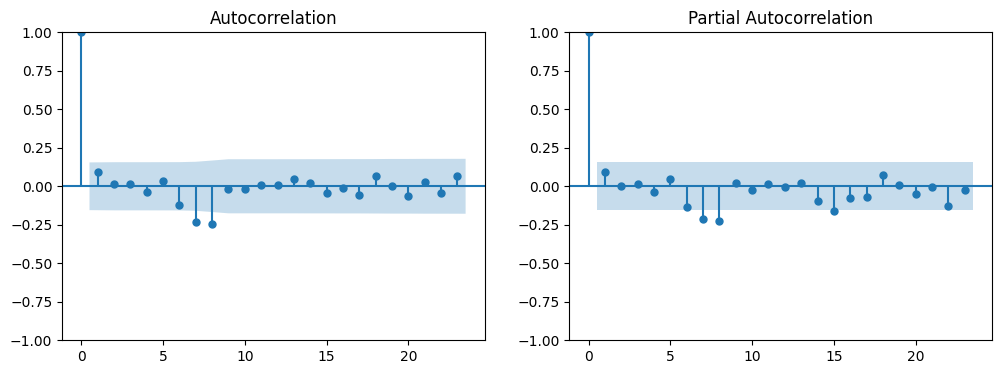

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p,d,q,s = 1,1,1,12

model = SARIMAX(time_series,order=(p,d,q),seasonal_order=(p,d,q,s))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                                CTR   No. Observations:                  161
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 673.939
Date:                            Sun, 11 Feb 2024   AIC                          -1337.877
Time:                                    13:57:25   BIC                          -1322.891
Sample:                                01-31-2018   HQIC                         -1331.788
                                     - 05-31-2031                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1894      2.258      0.084      0.933      -4.236       4.614
ma.L1         -0.1149      2.296   

In [ ]:
future_steps=100
predictions = results.predict(len(time_series.index), len(time_series.index) + future_steps - 1)
print(predictions)

2031-06-30    0.087814
2031-07-31    0.088911
2031-08-31    0.087968
2031-09-30    0.088448
2031-10-31    0.088782
                ...   
2039-05-31    0.088659
2039-06-30    0.088148
2039-07-31    0.089183
2039-08-31    0.088212
2039-09-30    0.088763
Freq: M, Name: predicted_mean, Length: 100, dtype: float64


In [ ]:
forecast = pd.DataFrame({'Original': time_series, 'Predictions': predictions})

fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.index,y=forecast['Predictions'],mode='lines',name='Predictions'))
fig.add_trace(go.Scatter(x=forecast.index,y=forecast['Original'],mode='lines',name='Original Data'))



fig.update_layout(title='CTR Forecasting',
                  xaxis_title='Time Period',
                  yaxis_title='Impressions',
                  legend=dict(x=0.1,y=0.9),
                  showlegend=True)

fig.show()